# **Capstone Project GRP4 NLP B**

## Installing Packages

In [182]:
!pip install -U textblob
!pip install translators
!pip install goslate
from goslate import Goslate
!pip install translate
!pip install googletrans==4.0.0-rc1
import googletrans
from googletrans import Translator
!pip install langdetect
!pip install ftfy
!pip install rpy2
!pip install googletrans
!pip install -U spacy
!pip install spacy-langdetect 
!python -m spacy validate
!python -m spacy download xx_ent_wiki_sm
!pip install h5py

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
  Using cached https://files.pythonhosted.org/packages/a0/28/85c7aa31b80d150b772fbe4a229487bc6644da9ccb7e427dd8cc60cb8a62/pluggy-0.13.1-py2.py3-none-any.whl
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.13.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


  Using cached https://files.pythonhosted.org/packages/f5/f1/5a93c118663896d83f7bcbfb7f657ce1d0c0d617e6b4a443a53abcc658ca/pluggy-0.7.1-py2.py3-none-any.whl
ERROR: tox 3.20.1 has requirement pluggy>=0.12.0, but you'll have pluggy 0.7.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.13.1
    Uninstalling pluggy-0.13.1:
      Successfully uninstalled pluggy-0.13.1


Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.5)
✔ Loaded compatibility table

====================== Installed models (spaCy v2.3.5) ======================
ℹ spaCy installation: /usr/local/lib/python3.6/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   xx-ent-wiki-sm   xx_ent_wiki_sm   2.3.0   ✔
package   en-core-web-sm   en_core_web_sm   2.2.5   --> 2.3.1     


============================== Install updates ==============================
Use the following commands to update the model packages:
python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')


## Importing libraries

In [183]:
from google.colab import drive
import gc 
from google.colab import drive

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input, Flatten, GlobalMaxPool1D, SpatialDropout1D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import GRU, RNN, LSTM, TimeDistributed, Bidirectional
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors # Gensim contains word2vec models and processing tools
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from nltk import word_tokenize
from nltk.corpus import wordnet 
from keras.models import model_from_json
import os
import nltk
import string
import re

import spacy
from translate import Translator
from spacy_langdetect import LanguageDetector

from collections import Counter
from nltk.corpus import stopwords
from translate import Translator
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")
%load_ext rpy2.ipython
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

from textblob import Word
from ftfy import fix_text
tf.__version__
from googletrans import Translator
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk import word_tokenize
from googletrans import Translator
import pickle
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,accuracy_score,auc

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [184]:
'''nlp = spacy.load("xx_ent_wiki_sm")
'nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

def translate_spacy(para):
  doc = nlp(para)
  sentences = []
  for sent in doc.sents:
    translator = Translator(from_lang=sent._.language, to_lang='en')
    sentences.append(translator.translate(sent))
  return ".".join(sentences)'''

'nlp = spacy.load("xx_ent_wiki_sm")\n\'nlp.add_pipe(LanguageDetector(), name=\'language_detector\', last=True)\n\ndef translate_spacy(para):\n  doc = nlp(para)\n  sentences = []\n  for sent in doc.sents:\n    translator = Translator(from_lang=sent._.language, to_lang=\'en\')\n    sentences.append(translator.translate(sent))\n  return ".".join(sentences)'

## Downloading NLTK data

In [185]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [186]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mount your Google Drive

In [187]:
#### mounting google drive ####
drive.mount("/content/drive/")
folder_path = ("/content/drive/MyDrive/Capstone Project - Ticket Routing NLP") 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading data and creating a pickle function

In [188]:
ticket_data = ""

pickle_flag = False

## Get Pickle Data
def get_pickle_data(filename):
  pickle_data = open(folder_path + "/" + filename,'rb')
  return pickle.load(pickle_data)

## Dump Pickle Data
def pickle_dump(data_to_dump, filename):
  filehandler = open((folder_path+ "/" + filename),"wb")
  pickle.dump(data_to_dump,filehandler)

if not os.path.exists(folder_path + "/input_data.pickle"):
  ticket_data = pd.read_excel(folder_path + "/input_data.xlsx")
  print("picking from excel")
else:
  ticket_data = get_pickle_data("input_data.pickle")
  print("picking from pickle")
  print(len(ticket_data))

pickle_dump(ticket_data, "input_data.pickle")

picking from pickle
8500


## Data Analysis Begins

In [189]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [190]:
ticket_data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [191]:
unique_callers = ticket_data['Caller'].unique()
unique_callers.shape

(2950,)

In [192]:
Func_group = ticket_data['Assignment group'].unique()
Func_group.shape

(74,)

In [193]:
TargetGroupCnt=ticket_data['Assignment group'].value_counts()
TargetGroupCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [194]:
ticket_data.Caller.value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
ugvkyalo ayofwjpi      1
pblitjvq yqpjcfgx      1
szockfpj izohlgcq      1
olzsuean sojwhbrv      1
wvrgfdey ybfrlkvo      1
Name: Caller, Length: 2950, dtype: int64

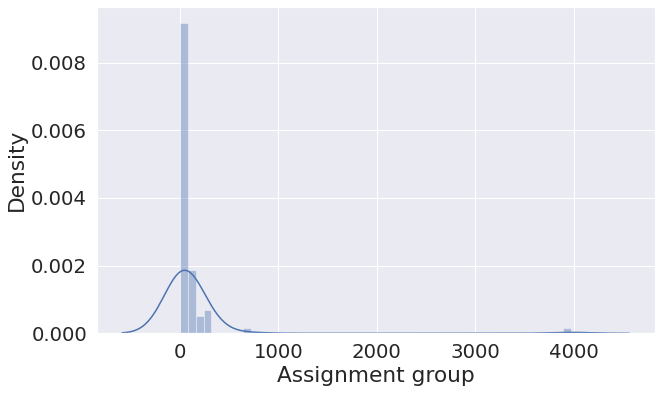

In [195]:
plt.figure(figsize=(10,6))
sns.distplot(ticket_data['Assignment group'].value_counts())

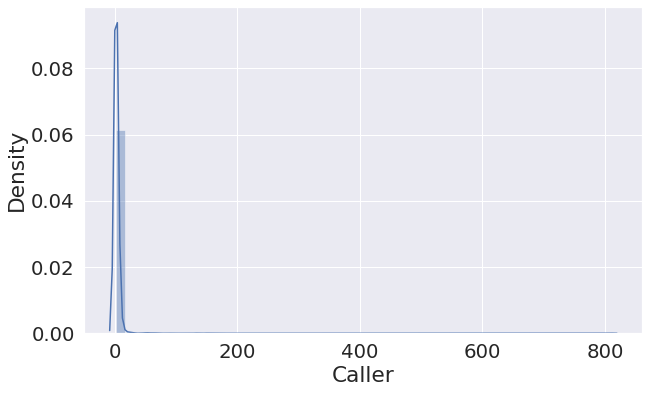

In [196]:
plt.figure(figsize=(10,6))
sns.distplot(ticket_data['Caller'].value_counts())

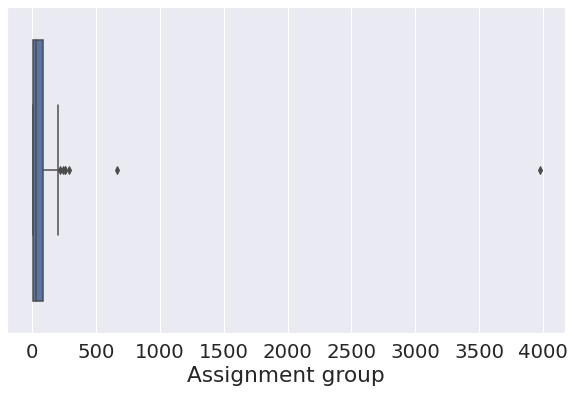

In [197]:
plt.figure(figsize=(10,6))
sns.boxplot(ticket_data['Assignment group'].value_counts())

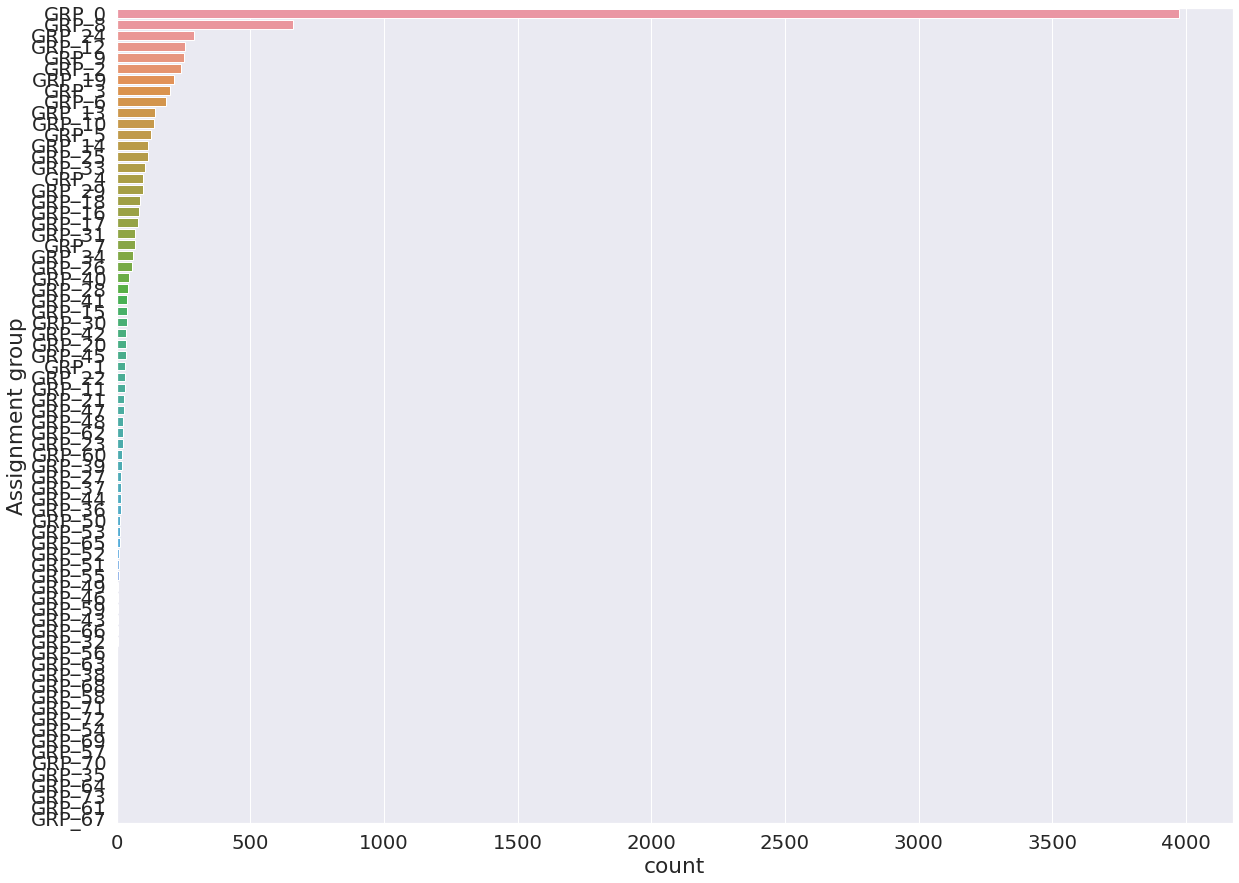

In [198]:
plt.figure(figsize=(20,15))
sns.countplot(y="Assignment group", data=ticket_data, order=ticket_data['Assignment group'].value_counts().index )

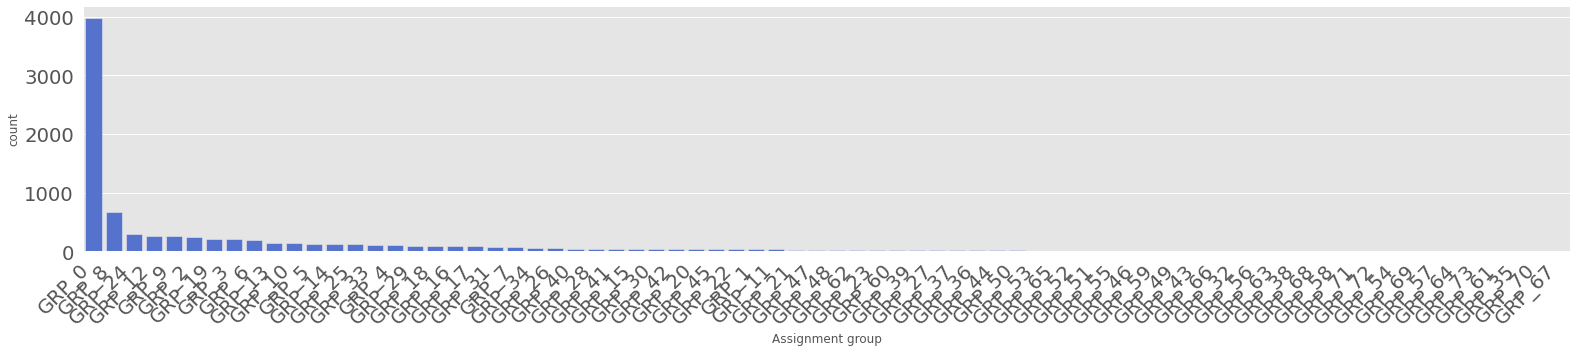

In [199]:
plt.style.use('ggplot')
%matplotlib inline

descending_order = ticket_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=ticket_data, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [200]:
ticket_data.isnull().values.any()

True

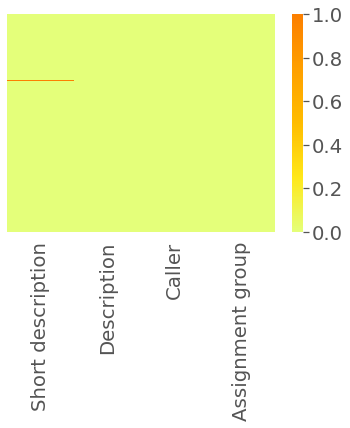

In [201]:
sns.heatmap(ticket_data.isnull(), yticklabels=False, cmap="Wistia")

In [202]:
ticket_data['Description'].fillna(value=' ', inplace=True)
ticket_data['Short description'].fillna(value=' ', inplace=True)
ticket_data.isnull().values.any()

False

## TODO: Somewhere in the initial EDA, We must remove the records where both Short desc and Desc are blank. While there is no such record in the data, we should still have this FUTURE ENHANCEMENT

In [203]:
summary_data=ticket_data.pivot_table(columns = "Assignment group",aggfunc='count')
summary_data

Assignment group   GRP_0  GRP_1  GRP_10  GRP_11  ...  GRP_72  GRP_73  GRP_8  GRP_9
Caller              3976     31     140      30  ...       2       1    661    252
Description         3976     31     140      30  ...       2       1    661    252
Short description   3976     31     140      30  ...       2       1    661    252

[3 rows x 74 columns]

In [204]:
ticket_data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [205]:
len(ticket_data['Assignment group'].unique())

74

In [206]:
df_assg = ticket_data['Assignment group'].value_counts().reset_index()
df_assg['percentage'] = (df_assg['Assignment group']/df_assg['Assignment group'].sum())*100
df_assg.head()

index  Assignment group  percentage
0   GRP_0              3976   46.776471
1   GRP_8               661    7.776471
2  GRP_24               289    3.400000
3  GRP_12               257    3.023529
4   GRP_9               252    2.964706

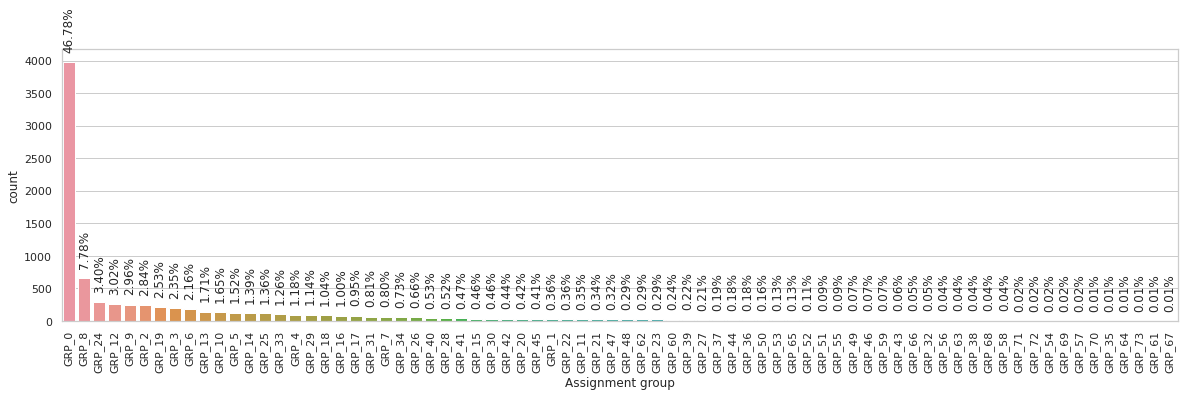

In [207]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=ticket_data, order=ticket_data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(ticket_data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Top 20 Assignment groups with highest number of tickets

In [208]:
df_top_assg = ticket_data['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_assg

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

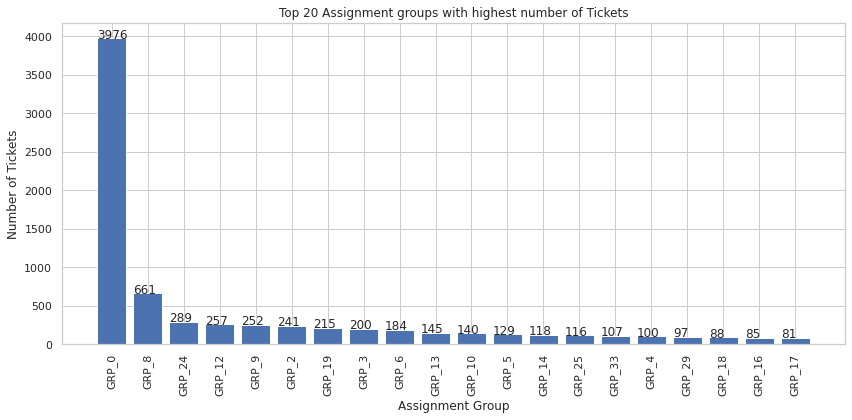

In [209]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_assg['index'],df_top_assg['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Visualize the percentage of incidents per assignment group

In [210]:
df_bottom_assg = ticket_data['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_assg

index  Assignment group
0   GRP_70                 1
1   GRP_35                 1
2   GRP_64                 1
3   GRP_73                 1
4   GRP_61                 1
5   GRP_67                 1
6   GRP_71                 2
7   GRP_72                 2
8   GRP_54                 2
9   GRP_69                 2
10  GRP_57                 2
11  GRP_56                 3
12  GRP_63                 3
13  GRP_38                 3
14  GRP_68                 3
15  GRP_58                 3
16  GRP_66                 4
17  GRP_32                 4
18  GRP_43                 5
19  GRP_49                 6

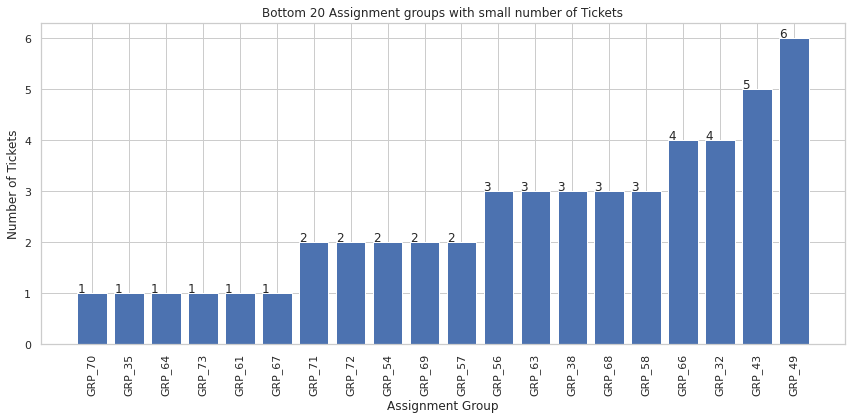

In [211]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_assg['index'],df_bottom_assg['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [212]:
df_tickets = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1','Ticket Count':len(df_assg[df_assg['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 1)& (df_assg['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 5)& (df_assg['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 10)& (df_assg['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 20)& (df_assg['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 50)& (df_assg['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 100)])}
#append row to the dataframe
df_tickets = df_tickets.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_tickets

Description Ticket Count
0           1            6
1         2-5           13
2        6-10            6
3       11-20            9
4       21-50           16
5      51-100            9
6        >100           15

(-1.1019890551483629,
 1.1224353061977401,
 -1.1079626168723997,
 1.1159579389457492)

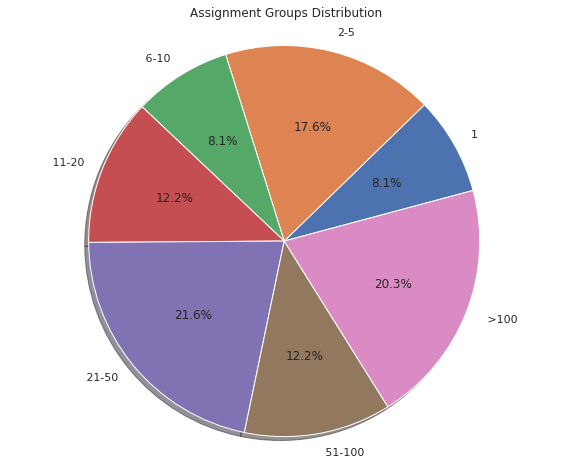

In [213]:
plt.figure(figsize=(10, 8))
plt.pie(df_tickets['Ticket Count'],labels=df_tickets['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal')

In [214]:
ticket_data[ticket_data['Short description'].isnull()]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [215]:
ticket_data[ticket_data['Description'].isnull()]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

## Begin Data Cleaning

### Replacing NaN

In [216]:
#Replace NaN values in Short Description and Description columns
ticket_data['Short description'] = ticket_data['Short description'].replace(np.nan, '', regex=True)
ticket_data['Description'] = ticket_data['Description'].replace(np.nan, '', regex=True)

### Decoding the data

In [217]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

### Prepping potential boilerplate text for removal

In [218]:
#As different lines are of different length. We need to pad the our sequences using the max length
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

## Cleaning the encoding

In [219]:
ticket_data['Description'] = ticket_data['Description'].apply(fn_decode_to_ascii)
ticket_data['Short description'] = ticket_data['Short description'].apply(fn_decode_to_ascii)
ftfy_ShortDescription = []
for Short_Description in ticket_data['Short description']:
  ftfy_ShortDescription.append(fix_text(Short_Description))
ticket_data['Short description']= ftfy_ShortDescription
ftfy_Description = []
for Description in ticket_data['Description']:
  ftfy_Description.append(fix_text(Description))
ticket_data['Description']= ftfy_Description

In [220]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]


In [221]:
test_data = ticket_data.copy()
test_data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [222]:
'''test_data = ticket_data.copy()
total_size = len (test_data)
# List of column data to consider for translation
trans_cols = ['Short description','Description']
# Add a new column to store the detected language
test_data.insert(loc=2, column='lang_short_desc', value=np.nan, allow_duplicates=True)
test_data.insert(loc=2, column='lang_desc', value=np.nan, allow_duplicates=True)
start = 0
stop = 100
i = 0
while (stop < total_size):
  gs = Goslate(service_urls=svc_urls)
  for idx in range(100):
    print(idx)
    lang = gs.detect(' '.join(test_data.loc[idx + start, trans_cols].tolist()))
    row_iter = gs.translate(test_data.loc[idx + start, trans_cols].tolist(), 
                            target_language='en', 
                            source_language='auto')
    test_data.loc[idx + start, trans_cols] = list(row_iter)
    test_data.lang_desc = lang

  start = start + 100
  stop = total_size if total_size - stop < 100 else stop + 100
  if start > total_size:
    break
  print("iter", start/100)
  time.sleep(1)'''

'test_data = ticket_data.copy()\ntotal_size = len (test_data)\n# List of column data to consider for translation\ntrans_cols = [\'Short description\',\'Description\']\n# Add a new column to store the detected language\ntest_data.insert(loc=2, column=\'lang_short_desc\', value=np.nan, allow_duplicates=True)\ntest_data.insert(loc=2, column=\'lang_desc\', value=np.nan, allow_duplicates=True)\nstart = 0\nstop = 100\ni = 0\nwhile (stop < total_size):\n  gs = Goslate(service_urls=svc_urls)\n  for idx in range(100):\n    print(idx)\n    lang = gs.detect(\' \'.join(test_data.loc[idx + start, trans_cols].tolist()))\n    row_iter = gs.translate(test_data.loc[idx + start, trans_cols].tolist(), \n                            target_language=\'en\', \n                            source_language=\'auto\')\n    test_data.loc[idx + start, trans_cols] = list(row_iter)\n    test_data.lang_desc = lang\n\n  start = start + 100\n  stop = total_size if total_size - stop < 100 else stop + 100\n  if start > to

### Defining Translation functions

In [223]:
translator = Translator(service_urls=[
      'translate.google.com'
    ])

##Translating word by word using Google and MyMemory
def translate_word_by_word(sentence):
  words = sentence.split(" ")
  new_words = []
  for word in words:
    lang = detect(word)
    translator = Translator(provider='translate.google.com', to_lang="en", from_lang = lang, secret_access_key=None)
    new_word = translator.translate(word)
    new_words.append(new_word)
  return " ".join(new_words)

def get_lang(para):
  para = para.strip()
  if para == "":
    return "en"
  
  lang = "en"
  try:
    lang = detect(para)
  except:
    attempts = 0
    lang = "en"
    while attempts < 3:
      try:
        lang = translator.detect(para).text
        break
      except:
        lang = "en"
        attempts = attempts + 1
        time.sleep(2)
  if lang == "":
    lang = "en"
  return lang 

## translating using googletranslate
def translate_sentence(para, lang, num):
  para = para.strip()
  if para == "":
    return para
  attempts = 0
  while attempts < 3:
    try:
      if lang != "en":
        translated_text = translator.translate(para, src = lang, dest = "en").text
        return translated_text
      else:
        return (para)
    except: 
      time.sleep(1) #adding a wait
      attempts = attempts + 1

  print("failed", " ", lang, " ", num)
  return para

def translate_sentence_no_wait(para, lang, num):
  para = para.strip()
  if para == "":
    return para
  try:
    if lang != "en":
      translated_text = translator.translate(para, src = lang, dest = "en").text
      return translated_text
    else:
      return (para)
  except: 
    print("failed", " ", lang, " ", num)
  return para

In [224]:
if os.path.exists(folder_path + "/" + "translated_data.pickle"):
  ticket_data = get_pickle_data("translated_data.pickle")
  print("picking from pickle")
else:
  ticket_data["lang_short_desc"] = ticket_data["Short description"].apply(get_lang)
  ticket_data["lang_desc"] = ticket_data["Description"].apply(get_lang)
  ticket_data["SD_translated_lang"] = ticket_data["lang_short_desc"]
  ticket_data["D_translated_lang"] = ticket_data["lang_desc"]
  ticket_data["SD_translated"] = ticket_data["Short description"]
  ticket_data["D_translated"] = ticket_data["Description"]
  j = 0
  counter = len(ticket_data)
  while ((np.sum(ticket_data["SD_translated_lang"] != "en") != 0) & (np.sum(ticket_data["D_translated_lang"] != "en") != 0)):
    for i in range(counter):
      if ticket_data["SD_translated_lang"][i] != "en":
        ticket_data["SD_translated"][i] = translate_sentence(ticket_data["SD_translated"][i], ticket_data["SD_translated_lang"][i],i)
        if ticket_data["SD_translated"][i] != ticket_data["Short description"][i]:
          ticket_data["SD_translated_lang"][i] = "en"
      if ticket_data["D_translated_lang"][i] != "en":
        ticket_data["D_translated"][i] = translate_sentence(ticket_data["D_translated"][i], ticket_data["D_translated_lang"][i],i)
        if ticket_data["D_translated"][i] != ticket_data["Description"][i]:
          ticket_data["D_translated_lang"][i] = "en"
    j = j + 1
    time.sleep(5)
    print("iteration", j, " SD remaining: ", np.sum(ticket_data["SD_translated_lang"] != "en"), "D remaining: ", np.sum(ticket_data["D_translated_lang"] != "en"))
    if j == 3:
      break

picking from pickle


Adding an Example of Translation

In [225]:
translate_sentence("Dies ist ein neues Projekt", "de", 0)

'This is a new project'

## What does translation look like before and after

(-1.1050873610958722,
 1.100271855038194,
 -1.1061017941082019,
 1.100465490404484)

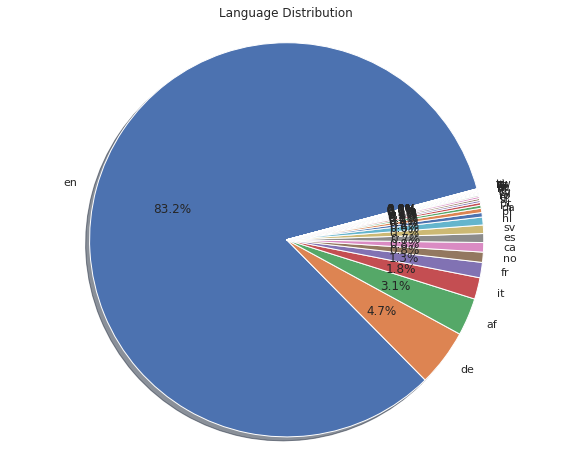

In [226]:
df_translations = ticket_data["lang_desc"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_translations["lang_desc"],labels=df_translations['index'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Language Distribution')
plt.axis('equal')

(-1.105142944681356,
 1.1002614318791866,
 -1.1058451907325328,
 1.1074810367083194)

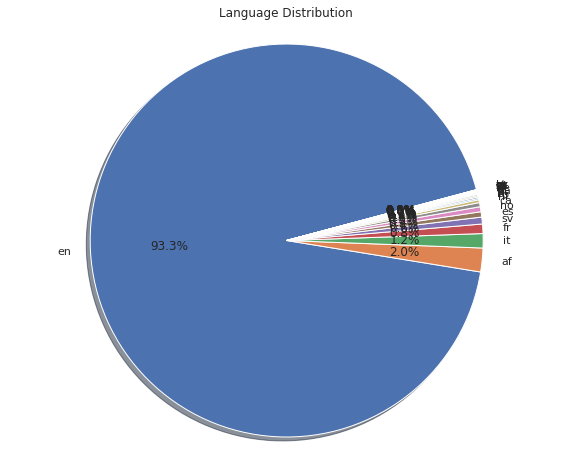

In [227]:
df_translations = ticket_data["D_translated_lang"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_translations["D_translated_lang"],labels=df_translations['index'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Language Distribution')
plt.axis('equal')

(-1.113696532490751,
 1.1006573677282772,
 -1.1024490309488284,
 1.118224784797805)

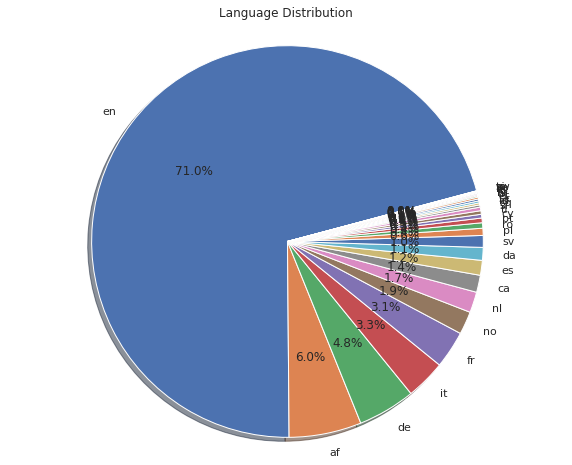

In [228]:
df_translations = ticket_data["lang_short_desc"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_translations["lang_short_desc"],labels=df_translations['index'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Language Distribution')
plt.axis('equal')

(-1.105913333256983,
 1.1003093827730925,
 -1.1052247701045919,
 1.1010449285423662)

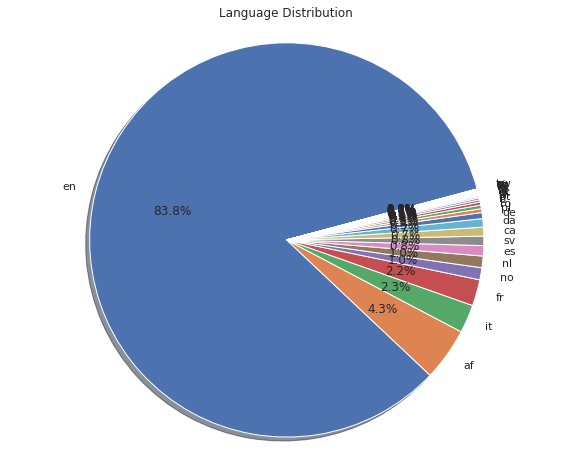

In [229]:
df_translations = ticket_data["SD_translated_lang"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_translations["SD_translated_lang"],labels=df_translations['index'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Language Distribution')
plt.axis('equal')

In [230]:
pickle_dump(ticket_data, "translated_data.pickle")

### Function for cleaning data

In [231]:
max_features = 10000
MAX_LENGTH = 300

def clean_text(text):
    if text != "":          
      '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
      and remove words containing numbers.'''
      '''text=text.replace(('first name: ').lower(),'firstname')
      text=text.replace(('last name: ').lower(),'lastname')
      text=text.replace(('received from:').lower(),'')
      text=text.replace('email:','')
      text=text.replace('email address:','') 
      index1=text.find('from:')
      index2=text.find('\nsddubject:')
      text=text.replace(text[index1:index2],'')
      index3=text.find('[cid:image')
      index4=text.find(']')
      text=text.replace(text[index3:index4],'')
      text=text.replace('subject:','')
      text=text.replace('received from:','')
      text=text.replace('this message was sent from an unmonitored email address', '')
      text=text.replace('please do not reply to this message', '')
      text=text.replace('monitoring_tool@company.com','MonitoringTool')
      text=text.replace('select the following link to view the disclaimer in an alternate language','')
      text=text.replace('description problem', '') 
      text=text.replace('steps taken far', '')
      text=text.replace('customer job title', '')
      text=text.replace('sales engineer contact', '')
      text=text.replace('description of problem:', '')
      text=text.replace('steps taken so far', '')
      text=text.replace('please do the needful', '')
      text=text.replace('please note that ', '')
      text=text.replace('please find below', '')
      text=text.replace('date and time', '')
      text=text.replace('kindly refer mail', '')
      text=text.replace('name:', '')
      text=text.replace('language:', '')
      text=text.replace('customer number:', '')
      text=text.replace('telephone:', '')
      text=text.replace('summary:', '')
      text=text.replace('sincerely', '')
      text=text.replace('company inc', '')
      text=text.replace('importance:', '')
      text=text.replace('gmail.com', '')
      text=text.replace('company.com', '')
      text=text.replace('microsoftonline.com', '')
      text=text.replace('company.onmicrosoft.com', '')
      text=text.replace('hello', '')
      text=text.replace('hallo', '')
      text=text.replace('hi it team', '')
      text=text.replace('hi team', '')
      text=text.replace('hi', '')
      text=text.replace('best', '')
      text=text.replace('kind', '')
      text=text.replace('regards', '')
      text=text.replace('good morning', '')
      text=text.replace('please', '')
      text=text.replace('regards', '')'''
      text = re.sub(r'\<a href', ' ', text)
      text = re.sub(r'&amp;', '', text)
      text = re.sub(r'<br />', ' ', text)    
      text = re.sub(r'\S+@\S+', '', text)
      text = re.sub(r'\d+','' ,text)
      text = re.sub(r'#','', text)
      text = re.sub(r'&;?', 'and',text)
      text = re.sub(r'\&\w*;', '', text)
      text = re.sub(r'https?:\/\/.*\/\w*', '', text)
      custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
      text = re.sub(r'\w*\d\w*', '', text)
      text = re.sub(r'\[.*?\]', '', text)
      text = re.sub(r'https?://\S+|www\.\S+', '', text)
      text = re.sub(r'<.*?>+', '', text)
      text= ''.join(c for c in text if c <= '\uFFFF') 
      text = text.strip()      
      text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
      text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
      text = re.sub(r'\r\n', '', text)
      text = re.sub(r'\n', '', text)
      text = re.sub(r'\S+@\S+', '', text)

      text = text.lower()
    return text

### Data cleaning, stop word removal and lemmatization

In [232]:
#ticket_data['lang_desc'] = ticket_data['Description'].apply(detect_lang)
#ticket_data['lang_short_desc'] = ticket_data['Short description'].apply(detect_lang)
#ticket_data['Description'] = ticket_data.apply(lambda x: fn_translate(x['Description']), axis=1)
#ticket_data['Short description'] = ticket_data.apply(lambda x: fn_translate(x['Short description']), axis=1)
ticket_data["Description"] = ticket_data["Description"].apply(clean_text)
ticket_data["Short description"] = ticket_data["Short description"].apply(clean_text)
ticket_data["D_translated"] = ticket_data["D_translated"].apply(clean_text)
ticket_data["SD_translated"] = ticket_data["SD_translated"].apply(clean_text)
print(len(ticket_data))

8500


In [233]:
ticket_pivot = ticket_data.pivot_table(aggfunc="count",columns ="Assignment group", values="Caller")
ticket_nums = np.array(ticket_pivot)
ticket_cols = ticket_pivot.columns
ticket_pivot_df = pd.DataFrame(data = ticket_nums, columns = ticket_cols, index = ["Number of tickets"])
ticket_pivot_df = ticket_pivot_df.transpose()
ticket_pivot_df.reset_index(inplace=True)

In [234]:
def filter_group_augment (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20) & (ticket_pivot_df["Number of tickets"]<1000)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_large (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>=1000)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_small (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]<=20)]["Assignment group"]):
    return True
  else:
    return False

def filter_group_AI (groupname):
  if groupname in list(ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20)]["Assignment group"]):
    return True
  else:
    return False

## Functions for augmentation

In [235]:
def replace_with_synonym(sentence):
  if sentence != "":
    synonym = ""
    words = sentence.split(" ")    
    repl_num = 0
    syn_idx = 0
    for i in range(7):
      if len(words) > 1:
        repl_num = rnd.randint(0,len(words)-1)
      elif len(words) == 1:
        repl_num = 0
      else:
        return sentence
      syns = wordnet.synsets(words[repl_num])
      if len(syns) > 1:
        syn_idx = rnd.randint(0,len(syns)-1)
        synonym = syns[syn_idx].lemmas()[0].name()
      elif len(syns) == 1:
        syn_idx = 0
        synonym = syns[syn_idx].lemmas()[0].name()
      else:
        synonym = ""
      if synonym != "" :
        sentence = re.sub(r"\b%s\b" % words[repl_num] , synonym, sentence)
        #sentence = sentence.replace(words[repl_num], synonym)
  return sentence

def drop_words(sentence):
  if sentence != "":
    words = sentence.split(" ")    
    repl_num = 0
    for i in range(5):
      if len(words) > 1:
        repl_num = rnd.randint(0,len(words)-1)
      elif len(words) == 1:
        repl_num = 0
      else:
        return sentence
      words[repl_num] = ""
    sentence = " ".join(words)
  return sentence

def scatter_sentences(para):
  sentences = para.split(".")
  i=0
  for sentence in sentences:
      sentences[i] = sentence.strip()
      i = i+1
  total = len(sentences)
  i = 0
  new_order = []
  while (len(new_order) < total):
      num = rnd.randint(0,total-1)
      if num not in new_order:
          new_order.append(num)
          i = i + 1
  new_sentences = [sentences[i] for i in new_order]
  total_sentences = len(new_sentences)
  return_para = ""
  for i in range(total_sentences):
    if not new_sentences[i] == "":
      if return_para == "":
        return_para = new_sentences[i]
      else:
        return_para = return_para + "." + new_sentences[i]
  return return_para

In [236]:
ticket_pivot_df_augment = ticket_pivot_df[(ticket_pivot_df["Number of tickets"]>20) & (ticket_pivot_df["Number of tickets"]<1000)]

In [237]:
ticket_pivot_df_augment = ticket_pivot_df_augment.reset_index()
ticket_pivot_df_augment.drop(["index"], axis = 1, inplace = True)

## Augmenting the records

In [238]:
def augment_data(df):
  total_grps = len(ticket_pivot_df_augment)
  ticket_data_updated = df.copy()
  list_to_add = []
  list_df = []
  col_names = ticket_data_updated.columns.values.tolist()
  for i in range(total_grps):
    grpname = ticket_pivot_df_augment["Assignment group"][i]
    group_df = ticket_data_updated[ticket_data_updated["Assignment group"]==grpname]
    list_df = group_df.values.tolist()
    group_df = None
    records_added = ticket_pivot_df_augment["Number of tickets"][i]
    while records_added < 500:
      list_df = list_df + list_df
      records_added = records_added + records_added
    list_to_add = list_to_add + list_df
    list_df = []
    gc.collect()
  #ticket_data_updated.info()
  #ticket_data_updated = pd.DataFrame(data = final_df, columns= col_names)
  df_to_add = pd.DataFrame(data = list_to_add, columns = ticket_data.columns)
  df_to_add["Description"] = df_to_add["Description"].apply(replace_with_synonym)
  df_to_add["Short description"] = df_to_add["Short description"].apply(replace_with_synonym)
  ticket_data_updated = pd.concat([ticket_data_updated, df_to_add],axis = 0)
  print("Garbage Collected", gc.collect())

  '''df_to_add = pd.DataFrame(data = list_to_add, columns = ticket_data.columns)
  df_to_add["Description"] = df_to_add["Description"].apply(scatter_sentences)
  df_to_add["Short description"] = df_to_add["Short description"].apply(scatter_sentences)
  ticket_data_updated = pd.concat([ticket_data_updated, df_to_add],axis = 0) 
  print("second:", gc.collect())

  df_to_add = pd.DataFrame(data = list_to_add, columns = ticket_data.columns)
  df_to_add["Description"] = df_to_add["Description"].apply(drop_words)
  df_to_add["Short description"] = df_to_add["Short description"].apply(drop_words)
  ticket_data_updated = pd.concat([ticket_data_updated, df_to_add],axis = 0)
  print("third", gc.collect())'''
  return ticket_data_updated

### Augment the data here
augmented_data = ""
if os.path.exists(folder_path + "/" + "augmented_data.pickle"):
  augmented_data = get_pickle_data("augmented_data.pickle")
  print("picking from pickle")
else:
  data_to_be_augmented = ticket_data[ticket_data["Assignment group"].apply(filter_group_augment)]
  data_large_tickets = ticket_data[ticket_data["Assignment group"].apply(filter_group_large)]
  data_small_tickets = ticket_data[ticket_data["Assignment group"].apply(filter_group_small)]
  augmented_data = augment_data(data_to_be_augmented)
  print("augmented")
  augmented_data = pd.concat([augmented_data,data_large_tickets], axis = 0)
  augmented_data = pd.concat([augmented_data,data_small_tickets], axis = 0)

augmented_data = augmented_data.reset_index()
augmented_data.drop(["index"], axis = 1, inplace = True)
gc.collect()
pickle_dump(augmented_data, "augmented_data.pickle")
augmented_data.head()

picking from pickle


Short description  ...                                       D_translated
0  event criticalhostnamecompanycom the value of ...  ...  event criticalhostnamecompanycom the value of ...
1        when undocking pc screen will not come back  ...        when undocking pc screen will not come back
2                     duplication of network address  ...  received from gentles i have two devices that ...
3  please reroute jobs on printer to printer issu...  ...  received from hi the printer printer is not wo...
4                  job job failed in jobscheduler at  ...    received from job job failed in jobscheduler at

[5 rows x 10 columns]

In [239]:
replace_with_synonym("My computer has stopped working. Seems to be a problem with the hard drive. Can Someone assist me and get this working again?I have important work to complete")

'My calculator has stopped working. Seems to be a problem with the hard drive. Can person assist me and get this working again?I have authoritative work to complete'

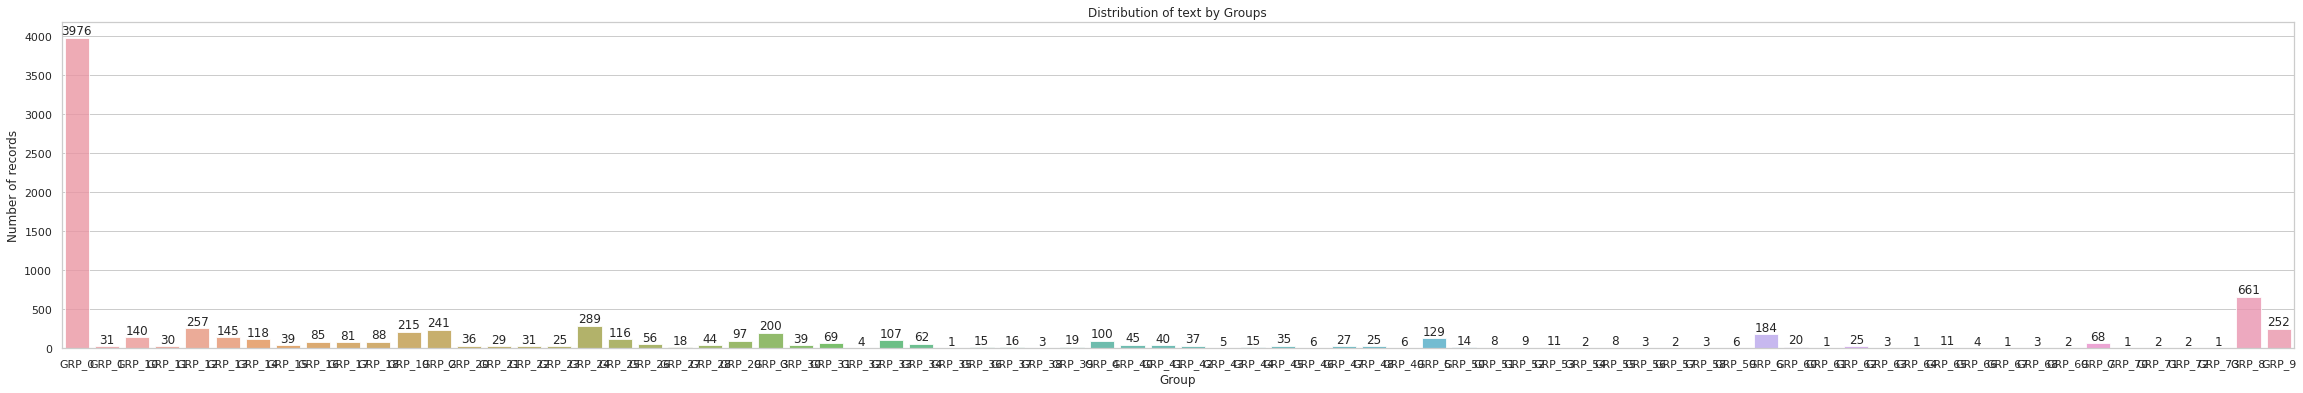

In [240]:
x = ticket_data["Assignment group"].value_counts()
x=x.sort_index()
plt.figure(figsize=(40,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Groups")
plt.ylabel('Number of records')
plt.xlabel('Group')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

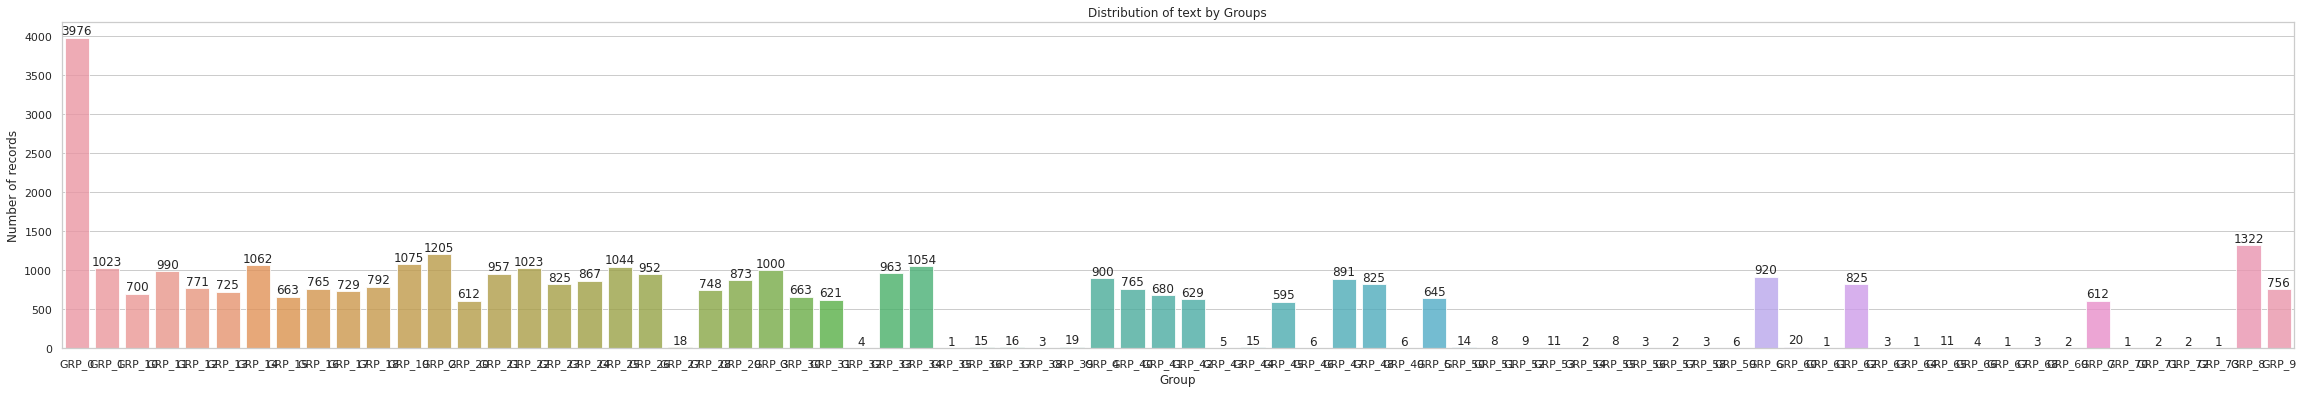

In [241]:
x = augmented_data["Assignment group"].value_counts()
x = x.sort_index()
plt.figure(figsize=(40,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Groups")
plt.ylabel('Number of records')
plt.xlabel('Group')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [242]:
augmented_data.shape

(37269, 10)

In [243]:
augmented_data

Short description  ...                                       D_translated
0      event criticalhostnamecompanycom the value of ...  ...  event criticalhostnamecompanycom the value of ...
1            when undocking pc screen will not come back  ...        when undocking pc screen will not come back
2                         duplication of network address  ...  received from gentles i have two devices that ...
3      please reroute jobs on printer to printer issu...  ...  received from hi the printer printer is not wo...
4                      job job failed in jobscheduler at  ...    received from job job failed in jobscheduler at
...                                                  ...  ...                                                ...
37264                           issues with lean tracker  ...                           issues with lean tracker
37265                            oneteam sso not working  ...  im unable to log in to hrtooloneteam through t...
37266  help with mss worklist since manager left company  ...  from qekdgaim wagshrzl sent saturday august am...
37267         ticket ticketno update to anftgup nftgyair  ...         ticket ticketno update to anftgup nftgyair
37268  an mehreren pcs lassen sich verschiedene prgra...  ...  different program types cannot be opened on se...

[37269 rows x 10 columns]

In [244]:
deep_learning_df = " "
if os.path.exists(folder_path + "/deep_learning_df.pickle"):
  deep_learning_df = get_pickle_data("deep_learning_df.pickle")
else:
  deep_learning_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_AI)]
deep_learning_df = deep_learning_df.reset_index()
deep_learning_df.drop(["index"], axis = 1, inplace = True)
deep_learning_df["Description_New"] = deep_learning_df["SD_translated"] + " " + deep_learning_df["D_translated"]
pickle_dump(deep_learning_df, "deep_learning_df.pickle")

In [245]:
deep_learning_df.shape

(37043, 11)

In [246]:
augmented_data.shape

(37269, 10)

In [247]:
stop = stopwords.words('english')
augmented_data["D_translated"] = augmented_data["D_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
augmented_data["SD_translated"] = augmented_data["SD_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
augmented_data['SD_translated']= augmented_data['SD_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
augmented_data['D_translated']= augmented_data['D_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

pickle_dump(augmented_data, "lemmatized_data.pickle")
augmented_data.head()

Short description  ...                                       D_translated
0  event criticalhostnamecompanycom the value of ...  ...  event criticalhostnamecompanycom value mountpo...
1        when undocking pc screen will not come back  ...                      undocking pc screen come back
2                     duplication of network address  ...  received gentles two device trying share ip ad...
3  please reroute jobs on printer to printer issu...  ...  received hi printer printer working need part ...
4                  job job failed in jobscheduler at  ...               received job job failed jobscheduler

[5 rows x 10 columns]

In [248]:
ticket_data["D_translated_lang"].value_counts()

en    7928
af     166
it     100
fr      66
sv      48
es      37
no      35
ca      29
nl      20
ro      10
tl      10
pl       9
da       9
pt       5
sl       5
de       4
lv       3
lt       3
fi       3
et       2
so       2
id       1
sk       1
cs       1
cy       1
hr       1
vi       1
Name: D_translated_lang, dtype: int64

In [249]:
ticket_data["SD_translated_lang"].value_counts()

en    7122
af     368
it     197
fr     183
no      84
nl      81
es      72
sv      65
ca      62
da      59
de      42
pl      27
ro      25
tl      21
pt      16
sl      13
sk      10
et       8
lt       7
lv       6
fi       6
cs       6
id       6
cy       5
vi       3
sq       2
so       2
sw       1
tr       1
Name: SD_translated_lang, dtype: int64

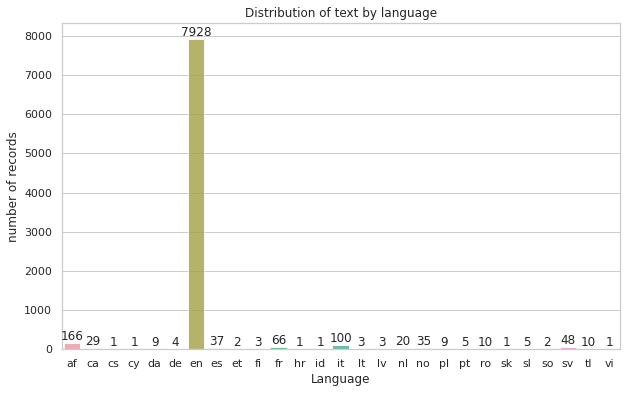

In [250]:
x = ticket_data["D_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

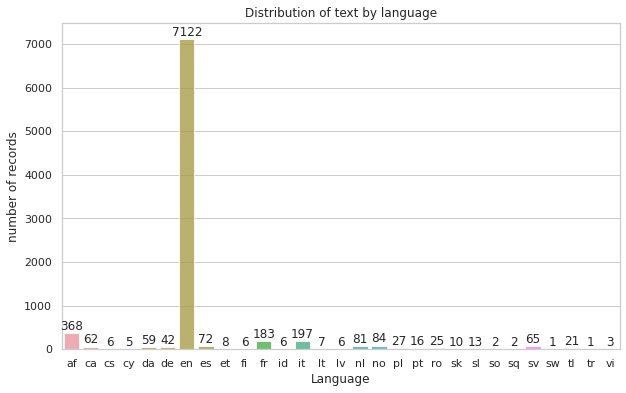

In [251]:
x = ticket_data["SD_translated_lang"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

## Feature Engineering

In [252]:
augmented_data['Description_New'] = augmented_data['SD_translated'] + " " + augmented_data['D_translated']
augmented_data['num_wds'] = augmented_data['Description_New'].apply(lambda x: len(x.split()))
augmented_data['num_wds'].mean()

24.532426413373045

In [253]:
print(augmented_data['num_wds'].max())
print(augmented_data['num_wds'].min())

819
0


In [254]:
len(augmented_data[augmented_data['num_wds']==0])

828

In [255]:
augmented_data['uniq_wds'] = augmented_data['Description_New'].str.split().apply(lambda x: len(set(x)))
augmented_data['uniq_wds'].head()

0     7
1     5
2    30
3    39
4     4
Name: uniq_wds, dtype: int64

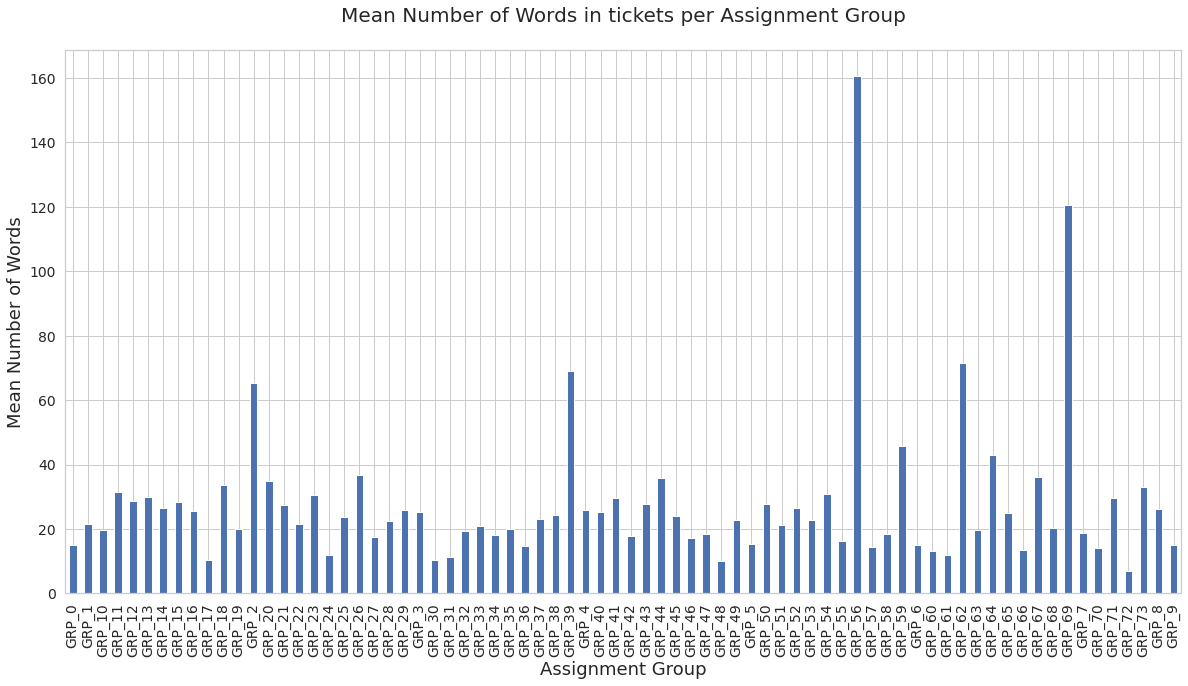

In [256]:
assign_grps = augmented_data.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Text(0.5, 0, 'Assignment Group')

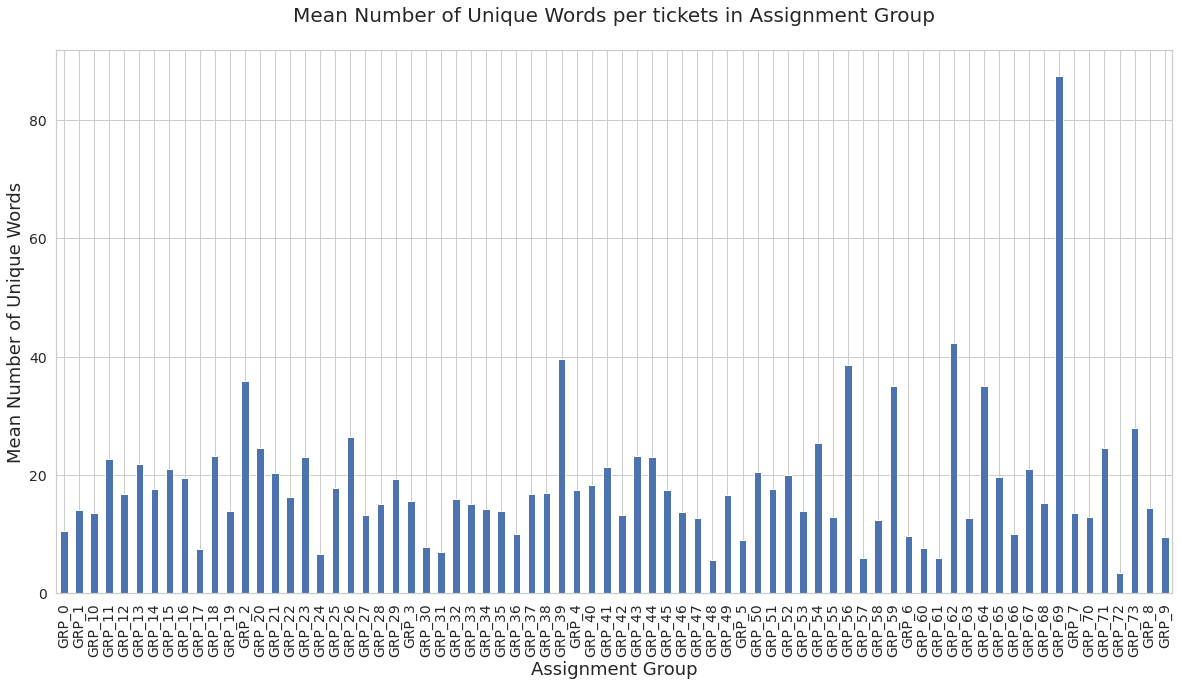

In [257]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18)

In [258]:
word_counts = Counter()
for i, row in augmented_data.iterrows():
    word_counts.update(row['Description_New'].split())
    
word_counts.most_common(20)

[('please', 12371),
 ('job', 12360),
 ('received', 10353),
 ('erp', 7570),
 ('user', 7352),
 ('jobscheduler', 7337),
 ('issue', 6755),
 ('error', 6590),
 ('failed', 6381),
 ('access', 6075),
 ('need', 5228),
 ('password', 5032),
 ('email', 4829),
 ('company', 4789),
 ('unable', 4657),
 ('crm', 4391),
 ('e', 4375),
 ('hostname', 4266),
 ('system', 4181),
 ('account', 4137)]

In [259]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
augmented_data['token_desc'] = augmented_data['Description_New'].apply(lambda x: tokenizer.tokenize(x))
augmented_data['token_desc'].head()

0    [event, criticalhostnamecompanycom, value, mou...
1    [undocking, pc, screen, come, back, undocking,...
2    [duplication, network, address, received, gent...
3    [please, reroute, job, printer, printer, issue...
4    [job, job, failed, jobscheduler, received, job...
Name: token_desc, dtype: object

In [260]:
augmented_data.head()

Short description  ...                                         token_desc
0  event criticalhostnamecompanycom the value of ...  ...  [event, criticalhostnamecompanycom, value, mou...
1        when undocking pc screen will not come back  ...  [undocking, pc, screen, come, back, undocking,...
2                     duplication of network address  ...  [duplication, network, address, received, gent...
3  please reroute jobs on printer to printer issu...  ...  [please, reroute, job, printer, printer, issue...
4                  job job failed in jobscheduler at  ...  [job, job, failed, jobscheduler, received, job...

[5 rows x 14 columns]

## Splitting the data into rule based and Machine learning based processing

In [261]:
rule_based_df = " "
machine_learning_df = " "
if os.path.exists(folder_path + "/rule_based_df.pickle"):
  rule_based_df = get_pickle_data("rule_based_df.pickle")
else:
  rule_based_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_small)]

if os.path.exists(folder_path + "/machine_learning_df.pickle"):
  machine_learning_df = get_pickle_data("machine_learning_df.pickle")
else:
  machine_learning_df = augmented_data[augmented_data["Assignment group"].apply(filter_group_AI)]

In [262]:
machine_learning_df.shape

(37043, 14)

In [263]:
deep_learning_df.shape

(37043, 11)

In [264]:
rule_based_df.shape

(226, 14)

In [265]:
augmented_data.shape

(37269, 14)

In [266]:
machine_learning_df = machine_learning_df.reset_index()
machine_learning_df.drop(["index"], axis = 1, inplace = True)
rule_based_df = rule_based_df.reset_index()
rule_based_df.drop(["index"], axis = 1, inplace = True)
pickle_dump(rule_based_df, "rule_based_df.pickle")
pickle_dump(machine_learning_df, "machine_learning_df.pickle")

## Feature engineering for Deep learning and Machine Learning

In [267]:
# build the vocabulary in one pass

stop_words = []
vocabulary = set()
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

if os.path.exists(folder_path + "/vocabulary.pickle"):
  vocabulary = get_pickle_data("vocabulary.pickle")
else:
  stop_words = stopwords.words('english') + list(punctuation)
  counter = len(machine_learning_df["token_desc"])
  for  i in range(counter):
      words = tokenize(str(machine_learning_df["Description_New"][i]))
      vocabulary.update(words)

  vocabulary = list(vocabulary) 
VOCABULARY_SIZE = len(vocabulary)
  
print(VOCABULARY_SIZE)

pickle_dump(vocabulary, "vocabulary.pickle")

24866


In [268]:
tfidf = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, max_features = 2000, analyzer = 'word', ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(machine_learning_df['Description_New'])

In [269]:
inc_tfidf.shape

(37043, 2000)

In [270]:
#  create a dictionary mapping the tokens to their tfidf values
'''tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']'''

"tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))\ntfidf = pd.DataFrame(columns=['tfidf']).from_dict(\n                    dict(tfidf), orient='index')\ntfidf.columns = ['tfidf']"

Top 20 Words with highest tfidf score

In [271]:
'''tfidf.sort_values(by=['tfidf'], ascending=False).head(20)'''

"tfidf.sort_values(by=['tfidf'], ascending=False).head(20)"

Bottom 10 words with lowest tfidf score

In [272]:
''' tfidf.sort_values(by=['tfidf'], ascending=True).head(10)'''

" tfidf.sort_values(by=['tfidf'], ascending=True).head(10)"

Dimentionality Reduction

In [273]:
'''from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(inc_tfidf)'''

'from sklearn.decomposition import TruncatedSVD\n\nn_comp=10\nsvd = TruncatedSVD(n_components=n_comp, random_state=42)\nsvd_tfidf = svd.fit_transform(inc_tfidf)'

In [274]:
'''from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)'''

'from sklearn.manifold import TSNE\ntsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)\ntsne_tfidf = tsne_model.fit_transform(svd_tfidf)'

In [275]:
'''from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(machine_learning_df['Description_New'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)'''

"from sklearn.decomposition import LatentDirichletAllocation\nfrom sklearn.feature_extraction.text import CountVectorizer\n# create count vectorizer first\ncvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))\ncvz = cvectorizer.fit_transform(machine_learning_df['Description_New'])\n\n# generate topic models using Latent Dirichlet Allocation\nlda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)\nX_topics = lda_model.fit_transform(cvz)"

In [276]:
'''n_top_words = 10
topic_summaries = []

# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))'''

"n_top_words = 10\ntopic_summaries = []\n\n# get topics and topic terms\ntopic_word = lda_model.components_ \nvocab = cvectorizer.get_feature_names()\n\nfor i, topic_dist in enumerate(topic_word):\n    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]\n    topic_summaries.append(' '.join(topic_words))\n    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))"

In [277]:
# collect the tfid matrix in numpy array
#array = inc_tfidf.todense()
array = inc_tfidf.todense()
inc_tfidf = None
# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
array = None
gc.collect()
df_inc.head(10)
df_inc.shape

(37043, 2000)

In [278]:
machine_learning_df.head()

Short description  ...                                         token_desc
0  event criticalhostnamecompanycom the value of ...  ...  [event, criticalhostnamecompanycom, value, mou...
1        when undocking pc screen will not come back  ...  [undocking, pc, screen, come, back, undocking,...
2                     duplication of network address  ...  [duplication, network, address, received, gent...
3  please reroute jobs on printer to printer issu...  ...  [please, reroute, job, printer, printer, issue...
4                  job job failed in jobscheduler at  ...  [job, job, failed, jobscheduler, received, job...

[5 rows x 14 columns]

In [279]:
df_inc = df_inc.reset_index()
df_inc.drop(['index'],axis=1, inplace = True)

In [280]:
df_inc.head()

0     1     2     3     4     5     ...  1994  1995  1996  1997  1998  1999
0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[5 rows x 2000 columns]

In [281]:
'''from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
new_features_df = machine_learning_df[["num_wds","uniq_wds"]]
new_features_scaled = min_max_scaler.fit_transform(new_features_df)
col_names = new_features_df.columns
new_features_df = pd.DataFrame(new_features_scaled, columns = col_names)'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max_scaler = MinMaxScaler()\nnew_features_df = machine_learning_df[["num_wds","uniq_wds"]]\nnew_features_scaled = min_max_scaler.fit_transform(new_features_df)\ncol_names = new_features_df.columns\nnew_features_df = pd.DataFrame(new_features_scaled, columns = col_names)'

In [282]:
#new_features_df

In [283]:
#df_inc['num_wds']= new_features_df['num_wds']
#df_inc['uniq_wds']= new_features_df['uniq_wds']
df_inc['Assignment group']= machine_learning_df['Assignment group']
df_inc.head()

0    1    2    3    4    5  ...  1995  1996  1997  1998  1999  Assignment group
0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0             GRP_1
1  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0             GRP_3
2  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0             GRP_4
3  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0             GRP_5
4  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0             GRP_6

[5 rows x 2001 columns]

In [284]:
features = df_inc.columns.tolist()
output = 'Assignment group'
# removing the output and the id from features
features.remove(output)

In [285]:
'''def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota'''

'def multiclass_logloss(actual, predicted, eps=1e-15):\n    """Multi class version of Logarithmic Loss metric.\n    :param actual: Array containing the actual target classes\n    :param predicted: Matrix with class predictions, one probability per class\n    """\n    # Convert \'actual\' to a binary array if it\'s not already:\n    if len(actual.shape) == 1:\n        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))\n        for i, val in enumerate(actual):\n            actual2[i, val] = 1\n        actual = actual2\n\n    clip = np.clip(predicted, eps, 1 - eps)\n    rows = actual.shape[0]\n    vsota = np.sum(actual * np.log(clip))\n    return -1.0 / rows * vsota'

In [286]:
non_eng_text=machine_learning_df.loc[machine_learning_df['Caller']=="gusyjcer lvbxfimr"]
non_eng_text

Short description  ...                                         token_desc
36638  aenderungsantrag kann nicht geloescht werden  ...  [change, request, cannot, deleted, change, req...
36639      net weaver business client does not work  ...  [netweaver, business, client, work, net, weave...

[2 rows x 14 columns]

In [287]:
Func_group = df_inc['Assignment group'].unique()
Func_group

array(['GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_33',
       'GRP_34', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_62', 'GRP_0'], dtype=object)

In [288]:
replaceStruct = {
                "Assignment group":{
                "GRP_0":0, "GRP_1":1, "GRP_3":3, "GRP_4":4, "GRP_5":5, "GRP_6":6, "GRP_7":7,
                "GRP_8":8, "GRP_9":9, "GRP_10":10, "GRP_11":11, "GRP_12":12, "GRP_13":13, "GRP_14":14,
                "GRP_15":15, "GRP_16":16, "GRP_17":17, "GRP_18":18, "GRP_19":19, "GRP_2":2,
                "GRP_20":20, "GRP_21":21, "GRP_22":22, "GRP_23":23, "GRP_24":24, "GRP_25":25,
                "GRP_26":26, "GRP_27":27, "GRP_28":28, "GRP_29":29, "GRP_30":30, "GRP_31":31,
                "GRP_33":33, "GRP_34":34, "GRP_35":35, "GRP_36":36, "GRP_37":37, "GRP_38":38,
                "GRP_39":39, "GRP_40":40, "GRP_41":41, "GRP_42":42, "GRP_43":43, "GRP_44":44,
                "GRP_45":45, "GRP_46":46, "GRP_47":47, "GRP_48":48, "GRP_49":49, "GRP_50":50,
                "GRP_51":51, "GRP_52":52, "GRP_53":53, "GRP_54":54, "GRP_55":55, "GRP_56":56,
                "GRP_57":57, "GRP_58":58, "GRP_59":59, "GRP_60":60, "GRP_61":61, "GRP_32":32,
                "GRP_62":62, "GRP_63":63, "GRP_64":64, "GRP_65":65, "GRP_66":66, "GRP_67":67,
                "GRP_68":68, "GRP_69":69, "GRP_70":70, "GRP_71":71, "GRP_72":72, "GRP_73":73}          
                 } 

In [289]:
df_inc_target=df_inc.replace(replaceStruct)
df_inc_target.head(10)

0    1    2    3    4    5  ...  1995  1996  1997  1998  1999  Assignment group
0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 1
1  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 3
2  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 4
3  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 5
4  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 6
5  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 7
6  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 8
7  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 6
8  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 8
9  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0                 8

[10 rows x 2001 columns]

## Stratified training splits

In [290]:
# Split X and y into training and test set in 70:30 ratio
x = df_inc_target.drop('Assignment group',axis=1)    
y = df_inc_target['Assignment group']   
def stratifiedSplitting (x1, y1, test_sizing):
  stratifiedSplitter = StratifiedShuffleSplit(n_splits=5, test_size=test_sizing, random_state=0)
  train, test = next(stratifiedSplitter.split(x1, y1))
  y_train = y1.iloc[train]
  y_test = y1.iloc[test]
  x_train = x1.iloc[train]
  x_test = x1.iloc[test]
  return x_train, x_test, y_train, y_test 

x_train, x_test, y_train, y_test = stratifiedSplitting(x, y, 0.3)
#stratifiedSplitter.get_n_splits(x, y)
#for train_index, test_index in stratifiedSplitter.split(x, y):
  #x_train, x_test = x[train_index], x[test_index]
  #y_train, y_test = y[train_index], y[test_index]
  #print(train_index)

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 



## Code to save and load deep learning models

In [291]:
def save_models(model, filename):
  json_for_model = model.to_json()
  with open(folder_path+ "/" + filename, "w") as json_file_writer:
      json_file_writer.write(json_for_model)
  # serialize weights to HDF5
  model.save_weights(folder_path+ "/" + filename.split(".")[0] + ".h5")

def load_models(filename):
  json_for_model = open(folder_path+ "/" + filename, 'r')
  read_json = json_for_model.read()
  json_for_model.close()
  json_for_model = None
  model_loaded = model_from_json(read_json)
  # load weights into new model
  model_loaded.load_weights(folder_path+ "/" + filename.split(".")[0] + ".h5")
  gc.collect()
  return model_loaded

## Logistic Regression

In [292]:
#Logistic Regression

# Fit the model on train
model = " "
if os.path.exists(folder_path + "/" + "model_Logistic.pickle"):
  model = get_pickle_data("model_Logistic.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression(solver="liblinear")
  model.fit(x_train, y_train)
  pickle_dump(model, "model_Logistic.pickle")
  logreg=model
  #predict on training data
y_predict1 = model.predict(x_train)

#predict on test data
y_predict2 = model.predict(x_test)
  
  # Use score method to get accuracy of model
print("Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict1)))
print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict2)))

Model Accuracy on Training Data: 0.8432
Model Accuracy on Test Data: 0.8179


In [293]:
logreg = model

In [112]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Classification Model':['Logistic Regression'], 'Training Accuracy': round(metrics.accuracy_score(y_train, y_predict1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test, y_predict2),2)},index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Classification Model', 'Training Accuracy','Test Accuracy']]
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1  Logistic Regression               0.84           0.82

(2.5, -0.5)

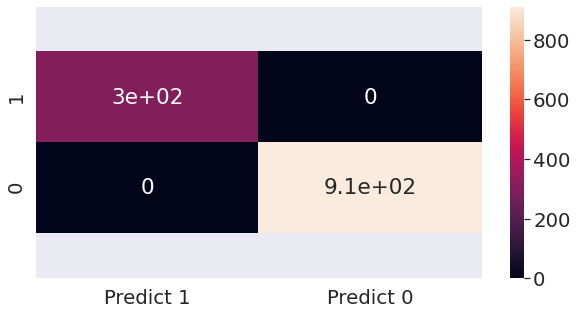

In [113]:
# Confusion Matrix for Logistic Regression
y_predict = model.predict(x_test)
y_predict_prob = model.predict_proba(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.8)
ax=sns.heatmap(df_cm, annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

In [114]:
best_model = " "
if os.path.exists(folder_path + "/" + "best_model_Logistic.pickle"):
  best_model = get_pickle_data("best_model_Logistic.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression()

  penalty = ['l1', 'l2']

  # Create regularization hyperparameter distribution using uniform distribution
  C = uniform(loc=0, scale=4)

  # Create hyperparameter options
  hyperparameters = dict(C=C, penalty=penalty)

  clf = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=5, cv=3, verbose=0, n_jobs=-1)

  best_model = clf.fit(x_train, y_train)
  pickle_dump(best_model, "best_model_Logistic.pickle")
best_model.best_params_

{'C': 3.730229437354635, 'penalty': 'l2'}

In [115]:
#Predict using the Best logistic regression model based on Hyper Parameter Tuning Results
Bestpredict_train = best_model.predict(x_train)
Bestpredict_test = best_model.predict(x_test)

# Use score method to get accuracy of model
print("Best Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, Bestpredict_train)))
print("Best Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, Bestpredict_test)))

Best Model Accuracy on Training Data: 0.8993
Best Model Accuracy on Test Data: 0.8758


In [116]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_HyperParam_LogisticReg = pd.DataFrame({'Classification Model':['Logistic Regression using Random Search'], 'Training Accuracy': round(metrics.accuracy_score(y_train, Bestpredict_train),2), 'Test Accuracy': round(metrics.accuracy_score(y_test, Bestpredict_test),2)},index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_HyperParam_LogisticReg])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88

In [117]:
best_model = " "
if os.path.exists(folder_path + "/" + "best_model_logistic_grid.pickle"):
  best_model = get_pickle_data("best_model_logistic_grid.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = LogisticRegression()
  parameters = [    
      {'penalty' : ['l1', 'l2'],
      'C' : [1, 10, 100],
      'solver' : ['liblinear']
      }]
  '''
  {'penalty' : ['l2', 'none'],
      'C' : np.logspace(-1, 1, 2),
      'solver' : ['newton-cg'],
      'max_iter' : [5]
      },
  {'penalty' : ['l1', 'l2'],
      'C' : np.logspace(-1, 1, 2),
      'solver' : ['liblinear'],
      'max_iter' : [5]
      },
  {'penalty' : ['l2', 'none'],
      'C' : np.logspace(-1, 1, 2),
      'solver' : ['sag'],
      'max_iter' : [5]
      }'''
  # Create grid search using 5-fold cross validation
  clf1 = GridSearchCV(model,
      parameters,
      scoring='accuracy',
      n_jobs= -1, verbose = 3,
      cv=3)
  # Fit grid search
  best_model = clf1.fit(x_train, y_train)
  pickle_dump(best_model, "best_model_logistic_grid.pickle")
best_model.best_params_
best_model.score(x_test, y_test)

0.897417439035364

In [118]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['Logistic Grid Classifier'], 'Training Accuracy': round((best_model.score(x_train,y_train)),2), 'Test Accuracy': round((best_model.score(x_test,y_test)),2)},index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90

## XGB models

In [119]:
#xgboost
# Fit the model on train
model = " "
if os.path.exists(folder_path + "/" + "model_XGB.pickle"):
  model = get_pickle_data("model_XGB.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.03, max_depth = 100, alpha = 5, n_estimators = 5)
  model.fit(x_train, y_train)
  pickle_dump(model, "model_XGB.pickle")

In [120]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.821635171615889
0.7881760100782866


In [121]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier1'], 'Training Accuracy': round((model.score(x_train,y_train)),2), 'Test Accuracy': round((model.score(x_test,y_test)),2)},index={'4'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79

In [122]:
#xgboost

#model = " "
if os.path.exists(folder_path + "/" + "model_XGB2.pickle"):
  model = get_pickle_data("model_XGB2.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.2, learning_rate = 0.3, max_depth = 200, n_estimators = 5)
  model.fit(x_train, y_train)
  pickle_dump(model, "model_XGB2.pickle")
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8752024681835712
0.8392873211554036


In [123]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier2'], 'Training Accuracy': round((model.score(x_train,y_train)),2), 'Test Accuracy': round((model.score(x_test,y_test)),2)},index={'5'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79
5                      XGBoost Classifier2               0.88           0.84

In [124]:
model = XGBClassifier(objective ='multi:softmax', n_estimators = 10) 
gc.collect()
param_test1 = {
    'max_depth':[100, 200], #range(3,6,1),
    'n_estimators': [10],
    'learning_rate': [0.01]
    }
clf = " "
if os.path.exists(folder_path + "/" + "grid_search_xgb.pickle"):
  clf = get_pickle_data("grid_search_xgb.pickle")
  #plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  search1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='accuracy', cv=2, verbose = True)
  clf = search1.fit(x_train, y_train)
  pickle_dump(clf, "grid_search_xgb.pickle")

In [125]:
clf.score(x_test, y_test)

0.7971744803383425

In [126]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_XGBC = pd.DataFrame({'Classification Model':['XGBoost Classifier Grid Search'], 'Training Accuracy': round((clf.score(x_train,y_train)),2), 'Test Accuracy': round((clf.score(x_test,y_test)),2)},index={'6'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_XGBC])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79
5                      XGBoost Classifier2               0.88           0.84
6           XGBoost Classifier Grid Search               0.83           0.80

## SVC

In [127]:
if os.path.exists(folder_path + "/" + "svc2.pickle"):
   classifier = get_pickle_data("svc2.pickle")
else:
  classifier = SVC(kernel = 'linear', class_weight = "balanced", random_state = 42)
  classifier.fit(x_train, y_train)
  
  #predict on training data
  y_predict1 = classifier.predict(x_train)

  #predict on test data
  y_predict2 = classifier.predict(x_test)

  pickle_dump(classifier, "svc2.pickle")

  # Use score method to get accuracy of model
  print("Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict1)))
  print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict2)))

  cm = confusion_matrix(y_test, y_predict2)
  sns.heatmap(cm)

In [128]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC = pd.DataFrame({'Classification Model':['Support Vector Classification'], 'Training Accuracy': round(metrics.accuracy_score(y_train, y_predict1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test, y_predict2),2)},index={'7'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC])
Accuracy_Matrix

Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79
5                      XGBoost Classifier2               0.88           0.84
6           XGBoost Classifier Grid Search               0.83           0.80
7            Support Vector Classification               0.84           0.82

In [129]:
# SVC Grid Search CV
if os.path.exists(folder_path + "/" + "SVC_gscv.pickle"):
  model_svc_gs = get_pickle_data("SVC_gscv.pickle")

else:

  model_svc_gs = SVC(random_state = 42)

  param_dist = {"kernel": ['poly', 'rbf'], # 'sigmoid'],
                'C': [10, 1000]
                }
  model_svc_gs = GridSearchCV(model_svc_gs, n_jobs=-1, param_grid=param_dist, cv = 3)
  model_svc_gs.fit(x_train,y_train)
  pickle_dump(model_svc_gs, "SVC_gscv.pickle")

In [130]:
model_svc_gs.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [131]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_GS = pd.DataFrame({'Classification Model':['Support Vector Classification (Grid Search)'], 'Training Accuracy': round((model_svc_gs.score(x_train,y_train)),2), 'Test Accuracy': round((model_svc_gs.score(x_test,y_test)),2)},index={'8'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_GS])
Accuracy_Matrix

Classification Model  ...  Test Accuracy
1                          Logistic Regression  ...           0.82
2      Logistic Regression using Random Search  ...           0.88
3                     Logistic Grid Classifier  ...           0.90
4                          XGBoost Classifier1  ...           0.79
5                          XGBoost Classifier2  ...           0.84
6               XGBoost Classifier Grid Search  ...           0.80
7                Support Vector Classification  ...           0.82
8  Support Vector Classification (Grid Search)  ...           0.92

[8 rows x 3 columns]

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

Model Accuracy on Training Data: 0.9292
Model Accuracy on Test Data: 0.9138


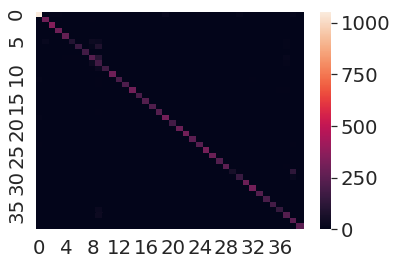

In [133]:
if os.path.exists(folder_path + "/" + "RandomForest1.pickle"):
   rf_classifier = get_pickle_data("RandomForest1.pickle")
else:
  rf_classifier = RandomForestClassifier(n_estimators = 10, random_state=1)
  rf_classifier.fit(x_train, y_train)
  pickle_dump(rf_classifier, "RandomForest1.pickle")

#predict on training data
y_predict1 = rf_classifier.predict(x_train)

#predict on test data
y_predict2 = rf_classifier.predict(x_test)

# Use score method to get accuracy of model
print("Model Accuracy on Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict1)))
print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict2)))

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm)

In [134]:
rf_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [135]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rf = pd.DataFrame({'Classification Model':['Random Forest Classifier'], 'Training Accuracy': round(metrics.accuracy_score(y_train, y_predict1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test, y_predict2),2)},index={'9'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rf])
Accuracy_Matrix

Classification Model  ...  Test Accuracy
1                          Logistic Regression  ...           0.82
2      Logistic Regression using Random Search  ...           0.88
3                     Logistic Grid Classifier  ...           0.90
4                          XGBoost Classifier1  ...           0.79
5                          XGBoost Classifier2  ...           0.84
6               XGBoost Classifier Grid Search  ...           0.80
7                Support Vector Classification  ...           0.82
8  Support Vector Classification (Grid Search)  ...           0.92
9                     Random Forest Classifier  ...           0.91

[9 rows x 3 columns]

##Random Forest Grid Search

In [136]:
rf_grid_search = " "
if os.path.exists(folder_path + "/" + "best_model_rf_grid.pickle"):
  rf_grid_search = get_pickle_data("best_model_rf_grid.pickle")

else:
  rf_gs = RandomForestClassifier(random_state=1)

  param_grid = { 
      'n_estimators': [10, 20, 30],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [100, 200, 300],
      'criterion' :['gini', 'entropy']
  }

  rf_grid_search = GridSearchCV(estimator=rf_gs, param_grid=param_grid, cv= 3)
  rf_grid_search = rf_grid_search.fit(x_train, y_train)

  pickle_dump(rf_grid_search, "best_model_rf_grid.pickle")
  print(rf_grid_search.best_params_)

In [137]:
print(rf_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 300, 'max_features': 'log2', 'n_estimators': 30}


In [138]:
rf_gs=RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 30, max_depth=300, criterion='entropy')
rf_gs.fit(x_train, y_train)
pred1=rf_gs.predict(x_train)
pred2=rf_gs.predict(x_test)

In [139]:
print('Accuracy Ensemble Model - RandomForest Classifier: ',accuracy_score(y_test,pred2))
print('Confusion Matrix Ensemble Model - RandomForest Classifier: \n',metrics.confusion_matrix(y_test, pred2))
print('Classification report  Ensemble Model - RandomForest Classifier: \n',metrics.classification_report(y_test, pred2))

Accuracy Ensemble Model - RandomForest Classifier:  0.9211734005219113
Confusion Matrix Ensemble Model - RandomForest Classifier: 
 [[1122    0    9 ...    0   12    0]
 [   0  300    0 ...    0    0    0]
 [   7    0  351 ...    0    0    3]
 ...
 [   0    0    0 ...  233    0    0]
 [   0    0    0 ...    0  248    0]
 [   0    0    0 ...    0    0  247]]
Classification report  Ensemble Model - RandomForest Classifier: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1193
           1       0.92      0.98      0.95       307
           2       0.97      0.97      0.97       362
           3       0.97      0.98      0.98       300
           4       0.99      1.00      1.00       270
           5       0.93      0.50      0.65       193
           6       0.94      0.58      0.72       276
           7       0.99      1.00      1.00       184
           8       0.71      0.61      0.66       397
           9       0.34      0.8

In [140]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rfgs = pd.DataFrame({'Classification Model':['Randon Forest Classifier (Grid Search)'], 'Training Accuracy': round(metrics.accuracy_score(y_train,pred1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test,pred2),2)},index={'10'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rfgs])
Accuracy_Matrix

Classification Model  ...  Test Accuracy
1                           Logistic Regression  ...           0.82
2       Logistic Regression using Random Search  ...           0.88
3                      Logistic Grid Classifier  ...           0.90
4                           XGBoost Classifier1  ...           0.79
5                           XGBoost Classifier2  ...           0.84
6                XGBoost Classifier Grid Search  ...           0.80
7                 Support Vector Classification  ...           0.82
8   Support Vector Classification (Grid Search)  ...           0.92
9                      Random Forest Classifier  ...           0.91
10       Randon Forest Classifier (Grid Search)  ...           0.92

[10 rows x 3 columns]

## LightGBM

In [141]:
!pip install lightgbm
!pip install lightgbm --install-option=--gpu

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [142]:
# build the lightgbm model
import lightgbm as lgb

if os.path.exists(folder_path + "/" + "light_gbm1.pickle"):
  model_lgb = get_pickle_data("light_gbm1.pickle")

else:
  model_lgb = lgb.LGBMClassifier(iterations=50, random_seed=42, loss_function='MultiClass')
  model_lgb.fit(x_train, y_train)
  pickle_dump(model_lgb, "light_gbm1.pickle")

In [143]:
pred1=model_lgb.predict(x_train)
pred2=model_lgb.predict(x_test)

In [144]:
print('Accuracy LightGBM: ',accuracy_score(y_test,pred2))
print('Confusion Matrix LightGBM: \n',metrics.confusion_matrix(y_test, pred2))
print('Classification report LightGBM: \n',metrics.classification_report(y_test, pred2))

Accuracy LightGBM:  0.9102852515072438
Confusion Matrix LightGBM: 
 [[1012    0   21 ...    0   18    1]
 [   0  300    0 ...    0    0    0]
 [   7    0  352 ...    0    0    3]
 ...
 [   0    0    0 ...  233    0    0]
 [   0    0    0 ...    0  248    0]
 [   0    0    0 ...    0    0  247]]
Classification report LightGBM: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1193
           1       0.92      0.98      0.95       307
           2       0.94      0.97      0.95       362
           3       0.95      0.96      0.96       300
           4       0.99      1.00      0.99       270
           5       0.95      0.50      0.65       193
           6       0.94      0.58      0.72       276
           7       0.99      1.00      0.99       184
           8       0.47      0.87      0.61       397
           9       0.55      0.31      0.40       227
          10       0.96      0.82      0.88       210
          11       0.

In [145]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_lgbm = pd.DataFrame({'Classification Model':['LightGBM'], 'Training Accuracy': round(metrics.accuracy_score(y_train,pred1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test,pred2),2)},index={'11'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_lgbm])
Accuracy_Matrix

Classification Model  ...  Test Accuracy
1                           Logistic Regression  ...           0.82
2       Logistic Regression using Random Search  ...           0.88
3                      Logistic Grid Classifier  ...           0.90
4                           XGBoost Classifier1  ...           0.79
5                           XGBoost Classifier2  ...           0.84
6                XGBoost Classifier Grid Search  ...           0.80
7                 Support Vector Classification  ...           0.82
8   Support Vector Classification (Grid Search)  ...           0.92
9                      Random Forest Classifier  ...           0.91
10       Randon Forest Classifier (Grid Search)  ...           0.92
11                                     LightGBM  ...           0.91

[11 rows x 3 columns]

In [146]:
# Light GBM Grid Search CV
if os.path.exists(folder_path + "/" + "light_gbm_gscv.pickle"):
  model_lgb = get_pickle_data("light_gbm_gscv.pickle")

else:

  model_lgb = lgb.LGBMClassifier(iterations=50, random_seed=42, loss_function='MultiClass')
  param_dist = {"max_depth": [25,50, 75],
                "learning_rate" : [0.05,0.1,0.2],
                "num_leaves": [100,200,300],
                "n_estimators": [20]
              }
  model_lgb = GridSearchCV(model_lgb, n_jobs=-1, param_grid=param_dist, cv = 5) #, scoring="roc_auc", verbose=5)
  model_lgb.fit(x_train,y_train)
  pickle_dump(model_lgb, "light_gbm_gscv.pickle")

In [147]:
model_lgb.best_params_

{'learning_rate': 0.2, 'max_depth': 75, 'n_estimators': 20, 'num_leaves': 200}

In [148]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_LGBM = pd.DataFrame({'Classification Model':['LightGBM (Grid Search)'], 'Training Accuracy': round((model_lgb.score(x_train,y_train)),2), 'Test Accuracy': round((model_lgb.score(x_test,y_test)),2)},index={'12'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_LGBM])
Accuracy_Matrix

Classification Model  ...  Test Accuracy
1                           Logistic Regression  ...           0.82
2       Logistic Regression using Random Search  ...           0.88
3                      Logistic Grid Classifier  ...           0.90
4                           XGBoost Classifier1  ...           0.79
5                           XGBoost Classifier2  ...           0.84
6                XGBoost Classifier Grid Search  ...           0.80
7                 Support Vector Classification  ...           0.82
8   Support Vector Classification (Grid Search)  ...           0.92
9                      Random Forest Classifier  ...           0.91
10       Randon Forest Classifier (Grid Search)  ...           0.92
11                                     LightGBM  ...           0.91
12                       LightGBM (Grid Search)  ...           0.91

[12 rows x 3 columns]

## CatBoost Classifier

In [139]:
!pip install catboost

     |████████████████████████████████| 66.3MB 61kB/s 


In [140]:
from catboost import CatBoostClassifier, Pool, cv

categorical_features_indices = np.where(x_train.dtypes != np.float)[0]
cat_boost = " "

if os.path.exists(folder_path + "/" + "cat_boost.pickle"):
  cat_boost = get_pickle_data("cat_boost.pickle")

else:
#  cat_boost = CatBoostClassifier(
#      custom_loss=['Accuracy'],
#      random_seed=42,
#      logging_level='Silent'
#  )
  cat_boost = CatBoostClassifier(iterations=300, learning_rate=0.3, depth=8, random_seed=42, loss_function='MultiClass')

  cat_boost.fit(
      x_train, y_train,
      cat_features=categorical_features_indices,
      eval_set=(x_test, y_test),
      logging_level='Verbose', 
      plot=True
  )
  pickle_dump(cat_boost, "cat_boost.pickle")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.1793418	test: 3.1808888	best: 3.1808888 (0)	total: 20.9s	remaining: 1h 44m 14s
1:	learn: 2.9197975	test: 2.9203671	best: 2.9203671 (1)	total: 41.9s	remaining: 1h 44m 1s
2:	learn: 2.7581223	test: 2.7587633	best: 2.7587633 (2)	total: 1m 4s	remaining: 1h 46m 39s
3:	learn: 2.6445239	test: 2.6457685	best: 2.6457685 (3)	total: 1m 25s	remaining: 1h 45m 57s
4:	learn: 2.5679314	test: 2.5793568	best: 2.5793568 (4)	total: 1m 47s	remaining: 1h 45m 36s
5:	learn: 2.4764832	test: 2.4942239	best: 2.4942239 (5)	total: 2m 8s	remaining: 1h 44m 44s
6:	learn: 2.4138391	test: 2.4336241	best: 2.4336241 (6)	total: 2m 29s	remaining: 1h 44m 10s
7:	learn: 2.3651318	test: 2.3871288	best: 2.3871288 (7)	total: 2m 50s	remaining: 1h 43m 47s
8:	learn: 2.2773524	test: 2.3032543	best: 2.3032543 (8)	total: 3m 11s	remaining: 1h 42m 55s
9:	learn: 2.2341496	test: 2.2577563	best: 2.2577563 (9)	total: 3m 32s	remaining: 1h 42m 41s
10:	learn: 2.1832371	test: 2.2094766	best: 2.2094766 (10)	total: 3m 53s	remaining: 1h

In [145]:
#Cross Validation CatBoost
if os.path.exists(folder_path + "/" + "cat_boost_cv.pickle"):
  cat_boost = get_pickle_data("cat_boost_cv.pickle")

else:
  cv_params = cat_boost.get_params()
  cv_params.update({
      'loss_function': 'MultiClass'
  })
  cv_data = cv(
      Pool(x_train, y_train, cat_features=categorical_features_indices),
      cv_params,
      plot=True
  )
  pickle_dump(cat_boost, "cat_boost_cv.pickle")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.2128406	test: 3.2171253	best: 3.2171253 (0)	total: 56.9s	remaining: 4h 43m 21s
1:	learn: 2.9902354	test: 2.9976143	best: 2.9976143 (1)	total: 1m 55s	remaining: 4h 45m 48s
2:	learn: 2.8230069	test: 2.8302522	best: 2.8302522 (2)	total: 2m 49s	remaining: 4h 39m 58s
3:	learn: 2.7032240	test: 2.7218707	best: 2.7218707 (3)	total: 3m 45s	remaining: 4h 37m 47s
4:	learn: 2.6049794	test: 2.6303100	best: 2.6303100 (4)	total: 4m 41s	remaining: 4h 36m 27s
5:	learn: 2.5333885	test: 2.5625397	best: 2.5625397 (5)	total: 5m 36s	remaining: 4h 35m 4s
6:	learn: 2.4728098	test: 2.5050795	best: 2.5050795 (6)	total: 6m 33s	remaining: 4h 34m 19s
7:	learn: 2.4244090	test: 2.4579383	best: 2.4579383 (7)	total: 7m 30s	remaining: 4h 34m 10s
8:	learn: 2.3502505	test: 2.3880215	best: 2.3880215 (8)	total: 8m 27s	remaining: 4h 33m 23s
9:	learn: 2.3060734	test: 2.3447280	best: 2.3447280 (9)	total: 9m 27s	remaining: 4h 34m 13s
10:	learn: 2.2565725	test: 2.2981147	best: 2.2981147 (10)	total: 10m 24s	remaining

In [146]:
cv_data

iterations  ...  train-MultiClass-std
0             0  ...              0.020102
1             1  ...              0.033770
2             2  ...              0.018175
3             3  ...              0.014626
4             4  ...              0.007292
..          ...  ...                   ...
295         295  ...              0.006611
296         296  ...              0.006381
297         297  ...              0.006118
298         298  ...              0.005100
299         299  ...              0.005711

[300 rows x 5 columns]

In [147]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-MultiClass-mean']),
    cv_data['test-MultiClass-std'][np.argmax(cv_data['test-MultiClass-mean'])],
    np.argmax(cv_data['test-MultiClass-mean'])
))

Best validation accuracy score: 3.22±0.02 on step 0


In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data_test['test-Accuracy-mean'])))

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_rf = pd.DataFrame({'Classification Model':['CatBoost Classifier'], 'Training Accuracy': round(np.max(cv_data['test-Accuracy-mean']),2), 'Test Accuracy': round(np.max(cv_data_test['test-Accuracy-mean']),2)},index={'13'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_rf])
Accuracy_Matrix

In [ ]:
#Grid Search CV CatBoost
if os.path.exists(folder_path + "/" + "cat_boost_gscv.pickle"):
  cat_boost = get_pickle_data("cat_boost_gscv.pickle")

else:
  model = CatBoostClassifier(iterations=200, random_seed=42, loss_function='MultiClass')

  grid = {'learning_rate': [0.3, 0.2],
          'depth': [6, 8]
          }
  catboost_grid_search = model.grid_search(grid, 
                                        X=x_train, 
                                        y=y_train, 
                                        plot=True)
  
  catboost_grid_search = catboost_grid_search.fit(x_train, y_train,
                                                  cat_features=categorical_features_indices,
                                                  eval_set=(x_test, y_test), 
                                                  cv = 5,
                                                  logging_level='Verbose', plot=True
                                                  )
  pickle_dump(catboost_grid_search, "cat_boost_gscv.pickle")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 1.285297904
bestIteration = 199

0:	loss: 1.2852979	best: 1.2852979 (0)	total: 13m 52s	remaining: 1h 51m 2s

bestTest = 1.434828981
bestIteration = 199

1:	loss: 1.4348290	best: 1.2852979 (0)	total: 27m 40s	remaining: 1h 36m 53s

bestTest = 1.797678266
bestIteration = 199

2:	loss: 1.7976783	best: 1.2852979 (0)	total: 41m 15s	remaining: 1h 22m 31s

bestTest = 1.094395644
bestIteration = 199

3:	loss: 1.0943956	best: 1.0943956 (3)	total: 1h 9m 29s	remaining: 1h 26m 51s

bestTest = 1.243693725
bestIteration = 199

4:	loss: 1.2436937	best: 1.0943956 (3)	total: 1h 37m 47s	remaining: 1h 18m 14s


In [ ]:
catboost_grid_search.best_params_

In [ ]:
+++++++########
cb_gs=CatBoostClassifier(iterations=200, random_seed=42, loss_function='MultiClass', )
cb_gs.fit(x_train, y_train)
pred1=cb_gs.predict(x_train)
pred2=cb_gs.predict(x_test)

In [ ]:
print('Accuracy CatBoost Classifier: ',accuracy_score(y_test,pred2))
print('Confusion Matrix CatBoost Classifier: \n',metrics.confusion_matrix(y_test, pred2))
print('Classification report CatBoost Classifier: \n',metrics.classification_report(y_test, pred2))

In [ ]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_cbgs = pd.DataFrame({'Classification Model':['CatBoost Classifier (Grid Search)'], 'Training Accuracy': round(metrics.accuracy_score(y_train,pred1),2), 'Test Accuracy': round(metrics.accuracy_score(y_test,pred2),2)},index={'14'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_cbgs])
Accuracy_Matrix

In [ ]:
params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(x_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(x_test, y_test, cat_features=categorical_features_indices)

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Base model test accuracy: {:.4}'.format(
    accuracy_score(y_test, model.predict(x_test))
))
print('')

print('Best model test accuracy: {:.4}'.format(
    accuracy_score(y_test, best_model.predict(x_test))
))

In [ ]:
%%time
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

In [ ]:
%%time
earlystop_params = params.copy()
earlystop_params.update({
    'od_type': 'Iter',
    'od_wait': 40
})
earlystop_model = CatBoostClassifier(**earlystop_params)
earlystop_model.fit(train_pool, eval_set=validate_pool);

In [ ]:
print('Simple model tree count: {}'.format(model.tree_count_))
print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Early-stopped model tree count: {}'.format(earlystop_model.tree_count_))
print('Early-stopped model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, earlystop_model.predict(X_validation))
))

In [ ]:
current_params = params.copy()
current_params.update({
    'iterations': 10
})
model = CatBoostClassifier(**current_params).fit(x_train, y_train, categorical_features_indices)
# Get baseline (only with prediction_type='RawFormulaVal')
baseline = model.predict(x_train, prediction_type='RawFormulaVal')
# Fit new model
model.fit(x_train, y_train, categorical_features_indices, baseline=baseline);

In [ ]:
params_with_snapshot = params.copy()
params_with_snapshot.update({
    'iterations': 5,
    'learning_rate': 0.5,
    'logging_level': 'Verbose'
})
model = CatBoostClassifier(**params_with_snapshot).fit(train_pool, eval_set=validate_pool, save_snapshot=True)
params_with_snapshot.update({
    'iterations': 10,
    'learning_rate': 0.1,
})
model = CatBoostClassifier(**params_with_snapshot).fit(train_pool, eval_set=validate_pool, save_snapshot=True)

In [ ]:
  params = {'learning_rate': 0.2, 'max_depth': 75, 'n_estimators': 20, 'num_leaves': 200}

  # Without Categorical Features
  model2 = lgb.train(params, d_train)
  auc2(model2, train, test)

  #With Catgeorical Features
  cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                  "ORIGIN_AIRPORT"]
  model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
  auc2(model2, train, test)

# Python Libraries for Feature Interpretation

## Yellowbrick

In [138]:
!pip install yellowbrick

In [139]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson",  size=(1080, 720))
visualizer.fit_transform(x_train)
visualizer.poof()

AttributeError: ignored

<Figure size 1080x720 with 0 Axes>

In [ ]:
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
visualizer = ClassificationReport(model, size=(1080, 720))
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

### ELI5

In [294]:
!!pip install eli5 --upgrade

['Requirement already up-to-date: eli5 in /usr/local/lib/python3.6/dist-packages (0.10.1)',
 'Requirement already satisfied, skipping upgrade: jinja2 in /usr/local/lib/python3.6/dist-packages (from eli5) (2.11.2)',
 'Requirement already satisfied, skipping upgrade: numpy>=1.9.0 in /usr/local/lib/python3.6/dist-packages (from eli5) (1.19.4)',
 'Requirement already satisfied, skipping upgrade: six in /usr/local/lib/python3.6/dist-packages (from eli5) (1.15.0)',
 'Requirement already satisfied, skipping upgrade: graphviz in /usr/local/lib/python3.6/dist-packages (from eli5) (0.10.1)',
 'Requirement already satisfied, skipping upgrade: scikit-learn>=0.18 in /usr/local/lib/python3.6/dist-packages (from eli5) (0.22.2.post1)',
 'Requirement already satisfied, skipping upgrade: attrs>16.0.0 in /usr/local/lib/python3.6/dist-packages (from eli5) (20.3.0)',
 'Requirement already satisfied, skipping upgrade: scipy in /usr/local/lib/python3.6/dist-packages (from eli5) (1.4.1)',
 'Requirement alread

In [306]:
import eli5
eli5.show_weights(logreg, top=10)

In [312]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=[], strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7f1e88a33a60>, use_idf=True,
                vocabulary=None)

In [318]:
tfidf = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, max_features = 2000, analyzer = 'word', ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(machine_learning_df['Description_New'])

In [ ]:
%%time

COLUMNS = list(X_train.columns)
default_preprocessor = TfidfVectorizer().build_preprocessor()

def field_extractor(field):
    field_idx = COLUMNS.index(field)
    return lambda x: default_preprocessor(x[field_idx])


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns, fn=lambda x: x):
        super().__init__()
        self.columns = columns
        self.field_idx = [COLUMNS.index(c) for c in columns]
        self.fn = fn

    def fit(self, x_train, *args, **kwargs):
        return self

    def transform(self, data, *args, **kwargs):
        if isinstance(data, list):
            data = np.array(data)
        return self.fn(data[:, self.field_idx])
    
    def get_feature_names(self):
        return self.columns

    
vectorizer = FeatureUnion([
    # ('q_score', FeatureSelector(['question_score'], fn=lambda x: np.log1p(x.astype(int)))),
    # ('subreddit', CountVectorizer(token_pattern='\w+', preprocessor=field_extractor('subreddit'))),
    ('question', TfidfVectorizer(max_features=1000, token_pattern="\w+", preprocessor=field_extractor('question_text'))),
    ('answer', TfidfVectorizer(max_features=1000, token_pattern="\w+", preprocessor=field_extractor('answer_text'))),
    ])

model = SGDRegressor(max_iter=5)
model.fit(vectorizer.fit_transform(X_train.values), np.log1p(y_train.values));

print("Valid RMSLE:", rmsle(y_test, np.expm1(model.predict(vectorizer.transform(X_test.values)))))

In [304]:
from eli5 import show_prediction
show_prediction(logreg, x_train.iloc[100], feature_names = x_train.columns.tolist(), show_feature_values=True)

###LIME

In [178]:
!pip install lime

     |████████████████████████████████| 276kB 12.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=66e51279cb3699a761dbeda5a99680d6d44f6cf0ab07f712176cc2a116f0eaf7
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [179]:
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns.values.tolist(), class_names=y_train.unique())

In [180]:
predict_fn = lambda x: logreg.predict_proba(x).astype(float)

In [181]:
exp = explainer.explain_instance(x_test.values[0], predict_fn, num_features=63)
exp.show_in_notebook(show_all=False)

### MLxtend 

In [131]:
!pip install mlxtend

In [132]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools

AttributeError: ignored

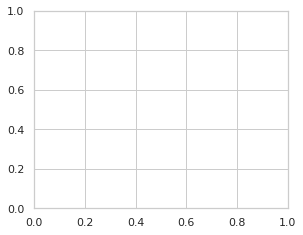

In [137]:
eclf = EnsembleVoteClassifier(clfs=[model,rf_classifier], weights=[1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest']
for clf, lab, grd in zip([model,rf_classifier],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(x_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array.x_train, y=np.array.y_train, clf=clf)
    plt.title(lab)

## Vocabularizing the Deep Learning Df

In [129]:
deep_learning_df.shape

(37043, 11)

In [130]:
def vocabularize(text, max_features):
  x = text
  vocabSize = max_features
  tokenizer = Tokenizer(num_words=vocabSize, split=' ')
  tokenizer.fit_on_texts(x)
  x = tokenizer.texts_to_sequences(x)
  x = pad_sequences(x,MAX_LENGTH)
  return x
x = vocabularize(deep_learning_df["Description_New"], max_features)
x

array([[   0,    0,    0, ..., 4654,    4,  628],
       [   0,    0,    0, ...,    8,  983,  338],
       [   0,    0,    0, ...,   99,  506,  144],
       ...,
       [   0,    0,    0, ..., 2206,  924,    8],
       [   0,    0,    0, ...,  295,  118,   41],
       [   0,    0,    0, ...,   44,   68,   10]], dtype=int32)

In [131]:
updated_deep_learning_df = deep_learning_df.replace(replaceStruct)
y = updated_deep_learning_df["Assignment group"]
y = np.array(y)
stratifiedSplitter = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train, test = next(stratifiedSplitter.split(x, y))
y_train = y[train]
y_test = y[test]
x_train = x[train]
x_test = x[test]

## Balancing the class weights

In [132]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [133]:
len(np.unique(y_train))
mapping = dict(zip([i for i in range(40)],np.unique(y_train)))
class_weights = dict(zip([i for i in range(40)],class_weights))
class_weights

{0: 0.23293208767517068,
 1: 0.9053770949720671,
 2: 0.7689798339264532,
 3: 0.9260714285714285,
 4: 1.0289682539682539,
 5: 1.4341814159292035,
 6: 1.0065993788819876,
 7: 1.5146028037383177,
 8: 0.7008108108108108,
 9: 1.2254253308128544,
 10: 1.3229591836734693,
 11: 0.9354256854256854,
 12: 1.200462962962963,
 13: 1.2760826771653544,
 14: 0.8724764468371468,
 15: 1.3970905172413792,
 16: 1.2094216417910448,
 17: 1.271078431372549,
 18: 1.1701263537906137,
 19: 0.8620345744680851,
 20: 1.5146028037383177,
 21: 0.9675373134328358,
 22: 0.9053770949720671,
 23: 1.1215397923875432,
 24: 1.0679571663920921,
 25: 0.8867989056087552,
 26: 0.9733483483483484,
 27: 1.237118320610687,
 28: 1.0609656301145662,
 29: 1.3970905172413792,
 30: 1.4902298850574713,
 31: 0.9617952522255193,
 32: 0.8783875338753387,
 33: 1.2094216417910448,
 34: 1.3618697478991597,
 35: 1.4732954545454546,
 36: 1.5545563549160673,
 37: 1.0388621794871795,
 38: 1.1234835355285961,
 39: 1.1215397923875432}

In [134]:
mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 33,
 32: 34,
 33: 40,
 34: 41,
 35: 42,
 36: 45,
 37: 47,
 38: 48,
 39: 62}

In [135]:
reversemapping = dict(zip([mapping[i] for i in mapping], [i for i in mapping]))
reversemapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 33: 31,
 34: 32,
 40: 33,
 41: 34,
 42: 35,
 45: 36,
 47: 37,
 48: 38,
 62: 39}

In [136]:
y_train

array([42, 19, 17, ...,  8, 20,  5])

## One Hot Encoding

In [137]:
count = len(y_train)
y_train_new = []
for i in range(count):
  y_train_new.append(reversemapping[y_train[i]])

count = len(y_test)
y_test_new = []
for i in range(count):
  y_test_new.append(reversemapping[y_test[i]])

y_train_new = np.array(y_train_new)
y_test_new = np.array(y_test_new)

In [138]:
y_train_final = np.zeros((y_train_new.size, y_train_new.max()+1))
y_train_final[np.arange(y_train_new.size),y_train_new] = 1
y_test_final = np.zeros((y_test_new.size, y_test_new.max()+1))
y_test_final[np.arange(y_test_new.size),y_test_new] = 1

In [139]:
y_train_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
y_train_final.shape

(25930, 40)

In [141]:
y_test_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
y_test_final.shape

(11113, 40)

## LSTM

In [143]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience = 5)

In [144]:
#### Add your code here ####
VOCAB_SIZE = max_features
model = " "
fitted_model = " "
plot_data_LSTM = " "
if os.path.exists(folder_path + "/" + "model_LSTM_trained.json"):
  model = load_models("model_LSTM_trained.json")
  model.load_weights(folder_path + "/" + "model_LSTM_trained.h5")
  model.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_LSTM = get_pickle_data("plot_data_LSTM.pickle")
else:
  model = Sequential() #creating sequential model
  model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 300, input_length = MAX_LENGTH)) #adding embedding layer
  model.add(SpatialDropout1D(0.2)) #added for robustness
  model.add(LSTM(units = 300, return_sequences = True, recurrent_dropout = 0.1)) #adding LSTM layer
  #model.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model.add(Flatten())
  model.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer

  #### Add your code here ####
  model.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model.fit(x_train, y_train_final, batch_size = 512, epochs=6, verbose=1, validation_split=0.1, class_weight = class_weights,callbacks = [es])
  save_models(model, "model_LSTM_trained.json")
  plot_data_LSTM = pd.DataFrame([fitted_model.history["accuracy"],fitted_model.history["val_accuracy"]]).transpose()
  plot_data_LSTM.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_LSTM, "plot_data_LSTM.pickle")
score, acc = model.evaluate(x_test, y_test_final,verbose = 1)

348/348 [==============================] - 32s 86ms/step - loss: 0.0176 - accuracy: 0.8839


In [145]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_SVC = pd.DataFrame({'Classification Model':['LSTM'], 'Training Accuracy': round(train_acc,2), 'Test Accuracy': round(test_acc,2)},index={'8'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC])
Accuracy_Matrix

348/348 [==============================] - 30s 86ms/step - loss: 0.0169 - accuracy: 0.8923


Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79
5                      XGBoost Classifier2               0.88           0.84
6           XGBoost Classifier Grid Search               0.83           0.80
7            Support Vector Classification               0.88           0.84
8                                     LSTM               0.91           0.89

In [146]:
print("accuracy", acc)

accuracy 0.892288327217102


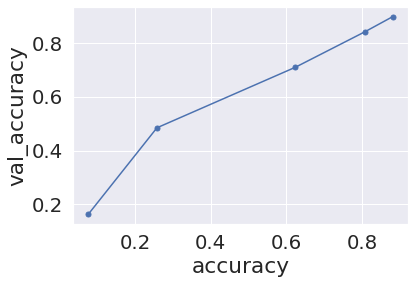

In [147]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_LSTM["accuracy"],plot_data_LSTM["val_accuracy"], ls = "-", marker = ".", markersize = "10")

## GRU

In [148]:
#### Add your code here ####
VOCAB_SIZE = max_features
model_GRU = " "
fitted_model = " "
plot_data_GRU = " "
if os.path.exists(folder_path + "/" + "model_GRU_trained.json"):
  model_GRU = load_models("model_GRU_trained.json")
  model_GRU.load_weights(folder_path + "/" + "model_GRU_trained.h5")
  model_GRU.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_GRU = get_pickle_data("plot_data_GRU.pickle")
else:
  model_GRU = Sequential() #creating sequential model
  model_GRU.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 300, input_length = MAX_LENGTH)) #adding embedding layer
  model_GRU.add(SpatialDropout1D(0.2)) #added for robustness
  model_GRU.add(GRU(units=MAX_LENGTH, return_sequences=True, input_shape=(MAX_LENGTH,1), activation='tanh'))
  #model_GRU.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model_GRU.add(Flatten())
  model_GRU.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer

  #### Add your code here ####
  model_GRU.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_GRU.fit(x_train, y_train_final, batch_size = 512, epochs=5, verbose=1, validation_split=0.1, class_weight = class_weights,callbacks = [es])
  save_models(model_GRU, "model_GRU_trained.json")
  plot_data_GRU = pd.DataFrame([fitted_model.history["accuracy"],fitted_model.history["val_accuracy"]]).transpose()
  plot_data_GRU.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_GRU, "plot_data_GRU.pickle")
score, acc = model_GRU.evaluate(x_test, y_test_final,verbose = 1)

348/348 [==============================] - 9s 12ms/step - loss: 0.0152 - accuracy: 0.9081


In [149]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_GRU.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model_GRU.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_SVC = pd.DataFrame({'Classification Model':['GRU'], 'Training Accuracy': round(train_acc,2), 'Test Accuracy': round(test_acc,2)},index={'9'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC])
Accuracy_Matrix

348/348 [==============================] - 4s 12ms/step - loss: 0.0147 - accuracy: 0.9111


Classification Model  Training Accuracy  Test Accuracy
1                      Logistic Regression               0.84           0.82
2  Logistic Regression using Random Search               0.90           0.88
3                 Logistic Grid Classifier               0.93           0.90
4                      XGBoost Classifier1               0.82           0.79
5                      XGBoost Classifier2               0.88           0.84
6           XGBoost Classifier Grid Search               0.83           0.80
7            Support Vector Classification               0.88           0.84
8                                     LSTM               0.91           0.89
9                                      GRU               0.93           0.91

In [150]:
print("accuracy", acc)

accuracy 0.911095142364502


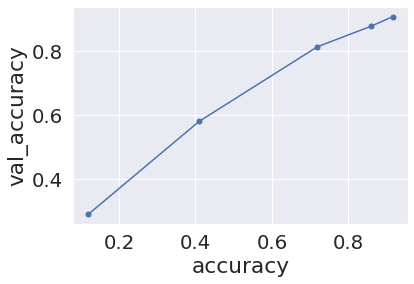

In [151]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_GRU["accuracy"],plot_data_GRU["val_accuracy"], ls = "-", marker = ".", markersize = "10")

## Bi directional LSTM

In [152]:
#### Add your code here ####
VOCAB_SIZE = max_features
fitted_model = " "
model_bi_LSTM = " "
plot_data_bi_LSTM = " "
if os.path.exists(folder_path + "/" + "model_bi_LSTM_trained.json"):
  model_bi_LSTM = load_models("model_bi_LSTM_trained.json")
  model_bi_LSTM.load_weights(folder_path + "/" + "model_bi_LSTM_trained.h5")
  model_bi_LSTM.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  plot_data_bi_LSTM = get_pickle_data("plot_data_bi_LSTM.pickle")
else:
  model_bi_LSTM = Sequential() #creating sequential model
  model_bi_LSTM.add(Embedding(input_dim = VOCAB_SIZE, output_dim = 300, input_length = MAX_LENGTH)) #adding embedding layer
  model_bi_LSTM.add(SpatialDropout1D(0.2)) #added for robustness
  model_bi_LSTM.add(Bidirectional(LSTM(units = 300, return_sequences = True, recurrent_dropout = 0.1))) #adding LSTM layer
  #model.add(TimeDistributed(Dense(100, activation = "relu"))) # timedistributed layer
  model_bi_LSTM.add(Flatten())
  model_bi_LSTM.add(Dense(len(np.unique(y)),activation="softmax")) #Dense layer
  model_bi_LSTM.compile(optimizer= "adam", loss ="binary_crossentropy",metrics =["accuracy"])
  fitted_model = model_bi_LSTM.fit(x_train, y_train_final, batch_size = 512, epochs=4, verbose=1, validation_split=0.1, class_weight = class_weights,callbacks = [es])
  save_models(model_bi_LSTM, "model_bi_LSTM_trained.json")
  plot_data_bi_LSTM = pd.DataFrame([fitted_model.history["accuracy"],fitted_model.history["val_accuracy"]]).transpose()
  plot_data_bi_LSTM.columns = ["accuracy","val_accuracy"]
  pickle_dump(plot_data_bi_LSTM, "plot_data_bi_LSTM.pickle")
score, acc = model_bi_LSTM.evaluate(x_test, y_test_final,verbose = 1)

348/348 [==============================] - 57s 162ms/step - loss: 0.0258 - accuracy: 0.8379


In [153]:
#Store the accuracy results of each model in a dataframe for final comparison
train_score, train_acc = model_bi_LSTM.evaluate(x_train, y_train_final,verbose = 1)
test_score, test_acc = model_bi_LSTM.evaluate(x_test, y_test_final,verbose = 1)
Accuracy_SVC = pd.DataFrame({'Classification Model':['Bi Directional LSTM'], 'Training Accuracy': round(train_acc,2), 'Test Accuracy': round(test_acc,2)},index={'10'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC])
Accuracy_Matrix

348/348 [==============================] - 56s 160ms/step - loss: 0.0255 - accuracy: 0.8455


Classification Model  Training Accuracy  Test Accuracy
1                       Logistic Regression               0.84           0.82
2   Logistic Regression using Random Search               0.90           0.88
3                  Logistic Grid Classifier               0.93           0.90
4                       XGBoost Classifier1               0.82           0.79
5                       XGBoost Classifier2               0.88           0.84
6            XGBoost Classifier Grid Search               0.83           0.80
7             Support Vector Classification               0.88           0.84
8                                      LSTM               0.91           0.89
9                                       GRU               0.93           0.91
10                      Bi Directional LSTM               0.87           0.85

In [154]:
print("accuracy", acc)

accuracy 0.8454962372779846


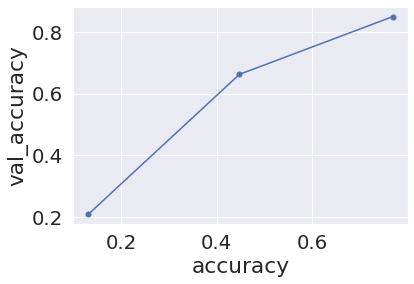

In [155]:
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.plot(plot_data_bi_LSTM["accuracy"],plot_data_bi_LSTM["val_accuracy"], ls = "-", marker = ".", markersize = "10")

## Rule based processing and final examples

In [156]:
rule_df = ticket_data[ticket_data["Assignment group"].apply(filter_group_small)]
stop = stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
rule_df["D_translated"] = rule_df["D_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
rule_df["SD_translated"] = rule_df["SD_translated"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
rule_df["Description_New"] = rule_df["SD_translated"] + " " + rule_df["D_translated"]
#rule_df['token_desc'] = rule_df['Description_New'].apply(lambda x: tokenizer.tokenize(x))
rule_df['Description_New'].head()

247    outlook crashing ic welcome next available age...
250    unable login sfb nameobanjrhg rnafleys languag...
401    need access erp kp need access kp enter foreca...
427    uacyltoe hxgayczeing pl ignore uacyltoe hxgayc...
456    primary telephone flow company eu eu plant hel...
Name: Description_New, dtype: object

In [157]:
rule_df = rule_df.reset_index()
rule_df = rule_df.drop(["index"], axis = 1)

In [158]:
def rule_matching (text, df_to_search):
  text_to_find = str(text).split()
  counter = 0 
  for word in text_to_find:
    for sentence in df_to_search:
      if word in sentence.split(" "):
        counter = counter + 1
        break
  return counter/len(text_to_find)

In [159]:
groups_to_search = pd.DataFrame(rule_df["Assignment group"].value_counts())
groups_to_search = groups_to_search.reset_index()
groups_to_search.columns = ["Assignment group", "Count"]

In [160]:
def detect_rule_based_percentages(text_to_match):
  total_groups = len(groups_to_search)
  percentages = []
  for i in range(total_groups):
    percentages.append(rule_matching(text_to_match, list(rule_df[rule_df["Assignment group"] == groups_to_search["Assignment group"][i]]["Description_New"])))
  return percentages

Plug in your testing variable here

In [161]:
text_to_detect = deep_learning_df["Description_New"][3000]

In [162]:
def check_text(text_to_detect):
  rule_based_result = detect_rule_based_percentages(text_to_detect)
  count_rule_based_groups = len(rule_based_result)
  max_prob = 0.7
  group_id = "Failed to assign group"
  text_to_detect = " ".join([x for x in str(text_to_detect).split() if x not in stop])
  for i in range(count_rule_based_groups):
    if rule_based_result[i] > max_prob:
      max_prob = rule_based_result[i]
      group_id = groups_to_search["Assignment group"][i]
  if group_id == "Failed to assign group":
    print("could not match through rules, will try machine learning")
    iterable_list = []
    best_model = get_pickle_data("best_model_logistic_grid.pickle")
    iterable_list = [text_to_detect]
    inc_tfidf_predict = tfidf.transform(iterable_list)
    array = inc_tfidf_predict.todense()
    inc_tfidf_predict = None
    # store the tf-idf array into pandas dataframe
    df_inc_predict = pd.DataFrame(array)
    array = None
    gc.collect()
    return ("GRP_" + "".join(str(best_model.predict(df_inc_predict))))
  else:
    return (group_id)

In [163]:
machine_learning_df["Assignment group"][3000]

'GRP_34'

In [164]:
check_text(machine_learning_df["Description_New"][3000])

could not match through rules, will try machine learning


'GRP_[34]'

In [165]:
check_text(rule_df["Description_New"][200])

'GRP_71'

In [166]:
rule_df["Assignment group"][200]

'GRP_71'

Similarly we can invoke deep learning instead of machine learning model also. 